In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from datetime import datetime, timedelta
# from sklearn.neighbors import KernelDensity
from IPython.display import set_matplotlib_formats
import numpy as np
import math
import networkx as nx
import seaborn as sns

set_matplotlib_formats('retina')

/Users/yiadka/dev/mobility_code/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_8606/96104281.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df_lockdown1 = pd.read_csv("./data/lockdown1.csv")
df_lockdown2 = pd.read_csv("./data/lockdown2.csv")
df_normal = pd.read_csv("./data/normal07_10.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/lockdown1.csv'

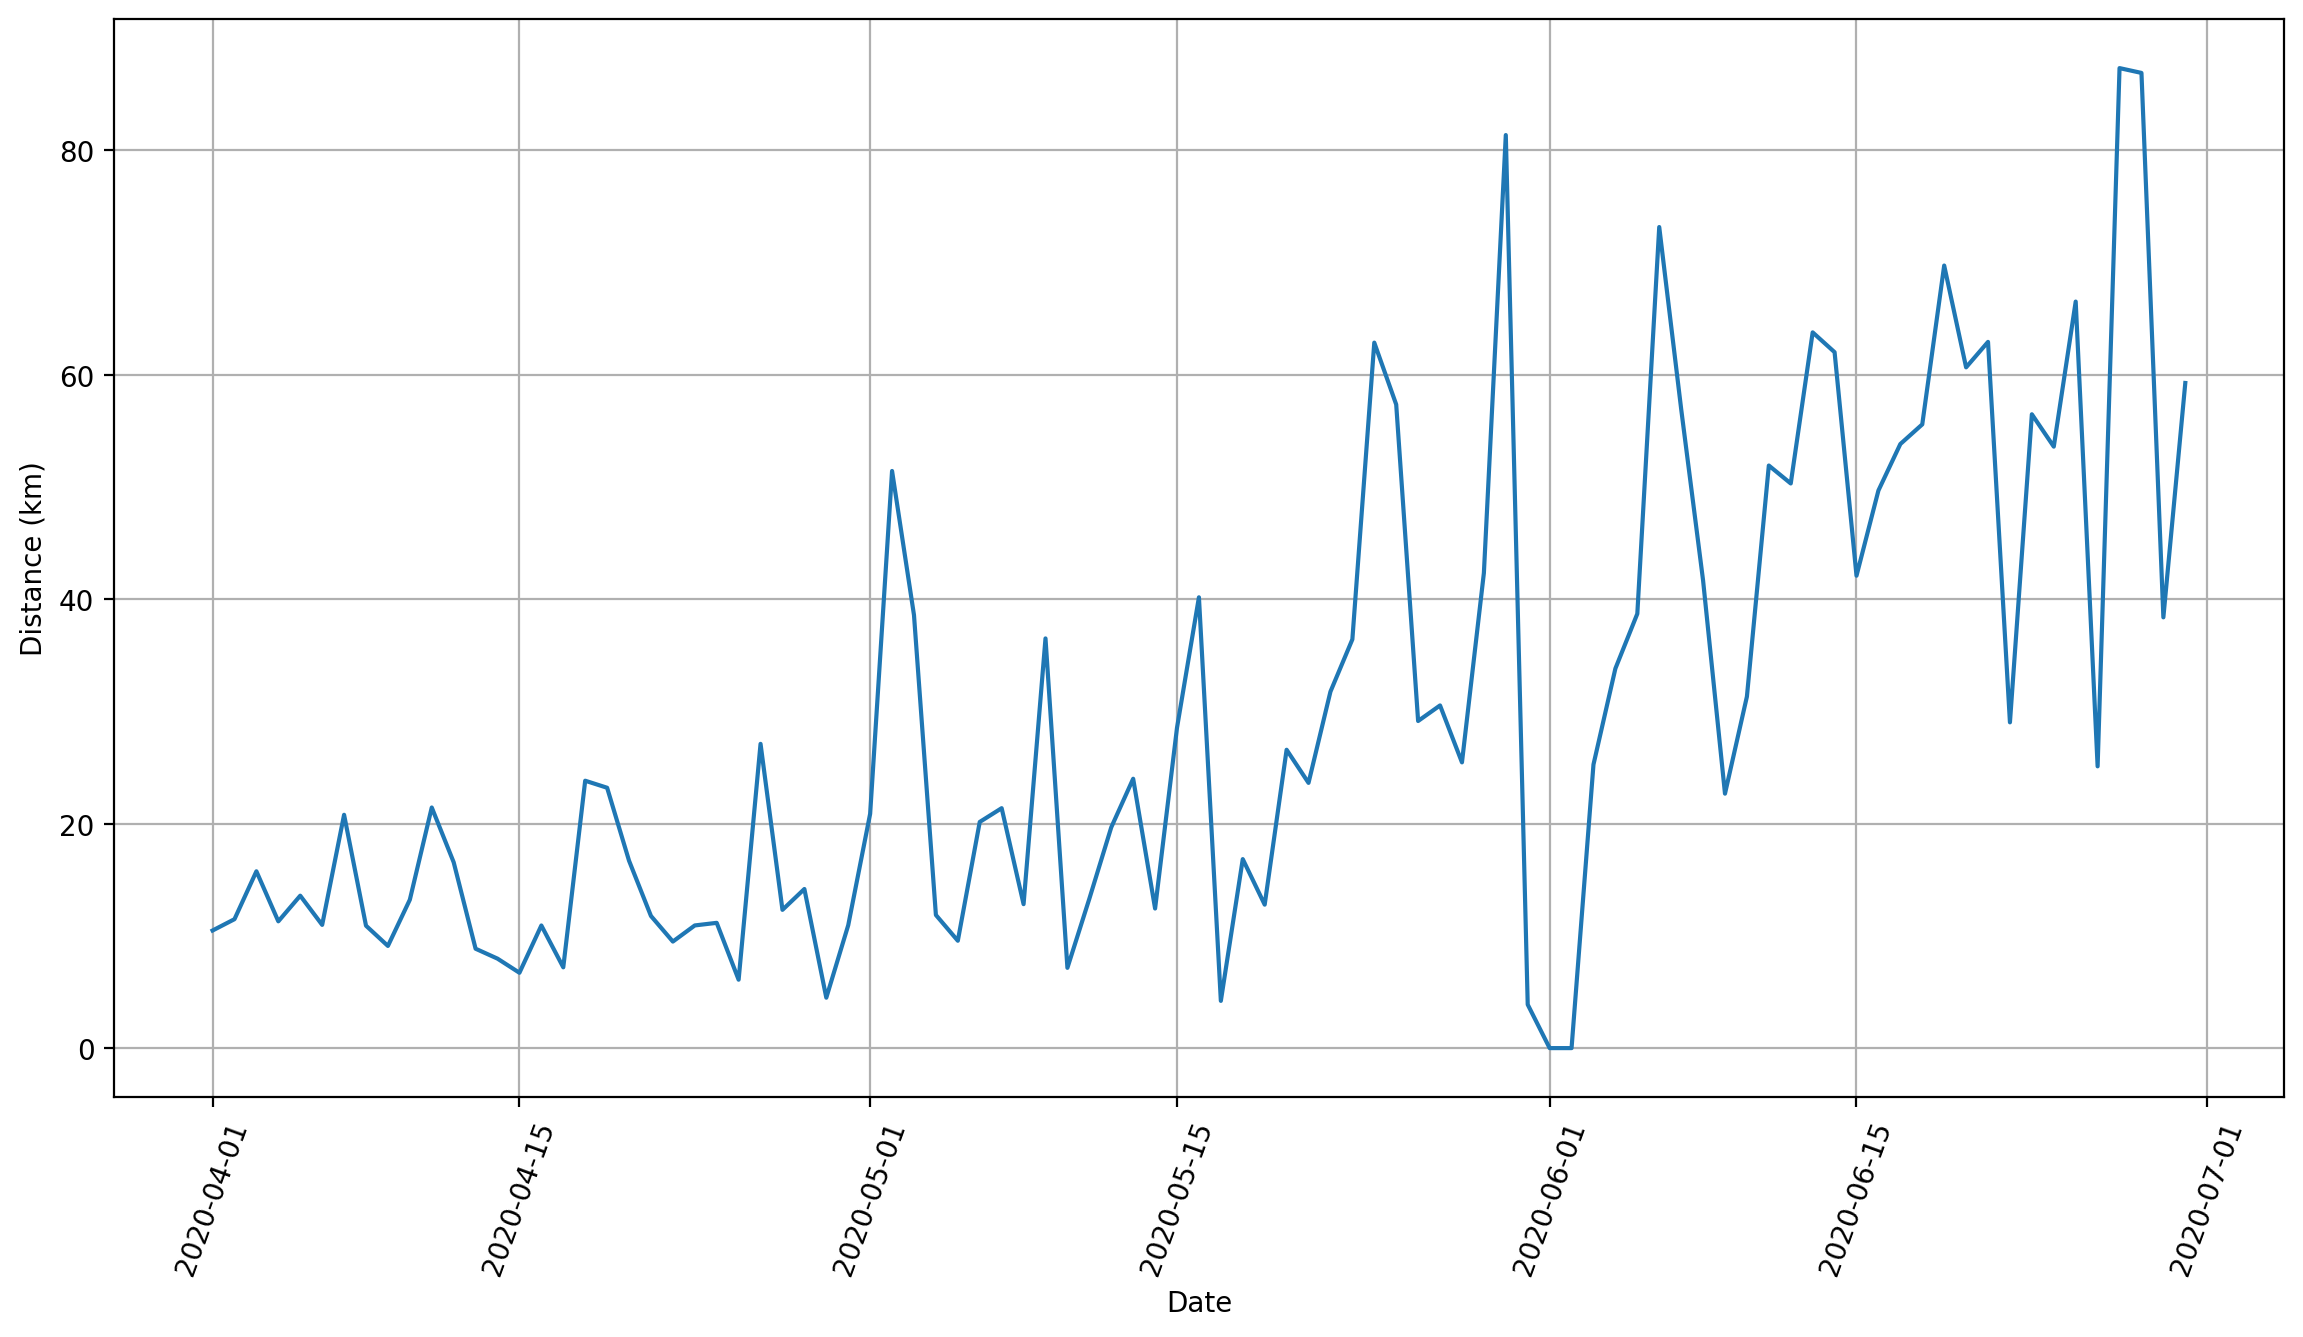

In [9]:
# 重みづけなし
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    # 距離をユニークな数のノード数で割る
    distance_list.append(subset["distance"].sum()/len(subset["start_station_name"].unique())) if len(subset["start_station_name"].unique()) != 0 else distance_list.append(0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


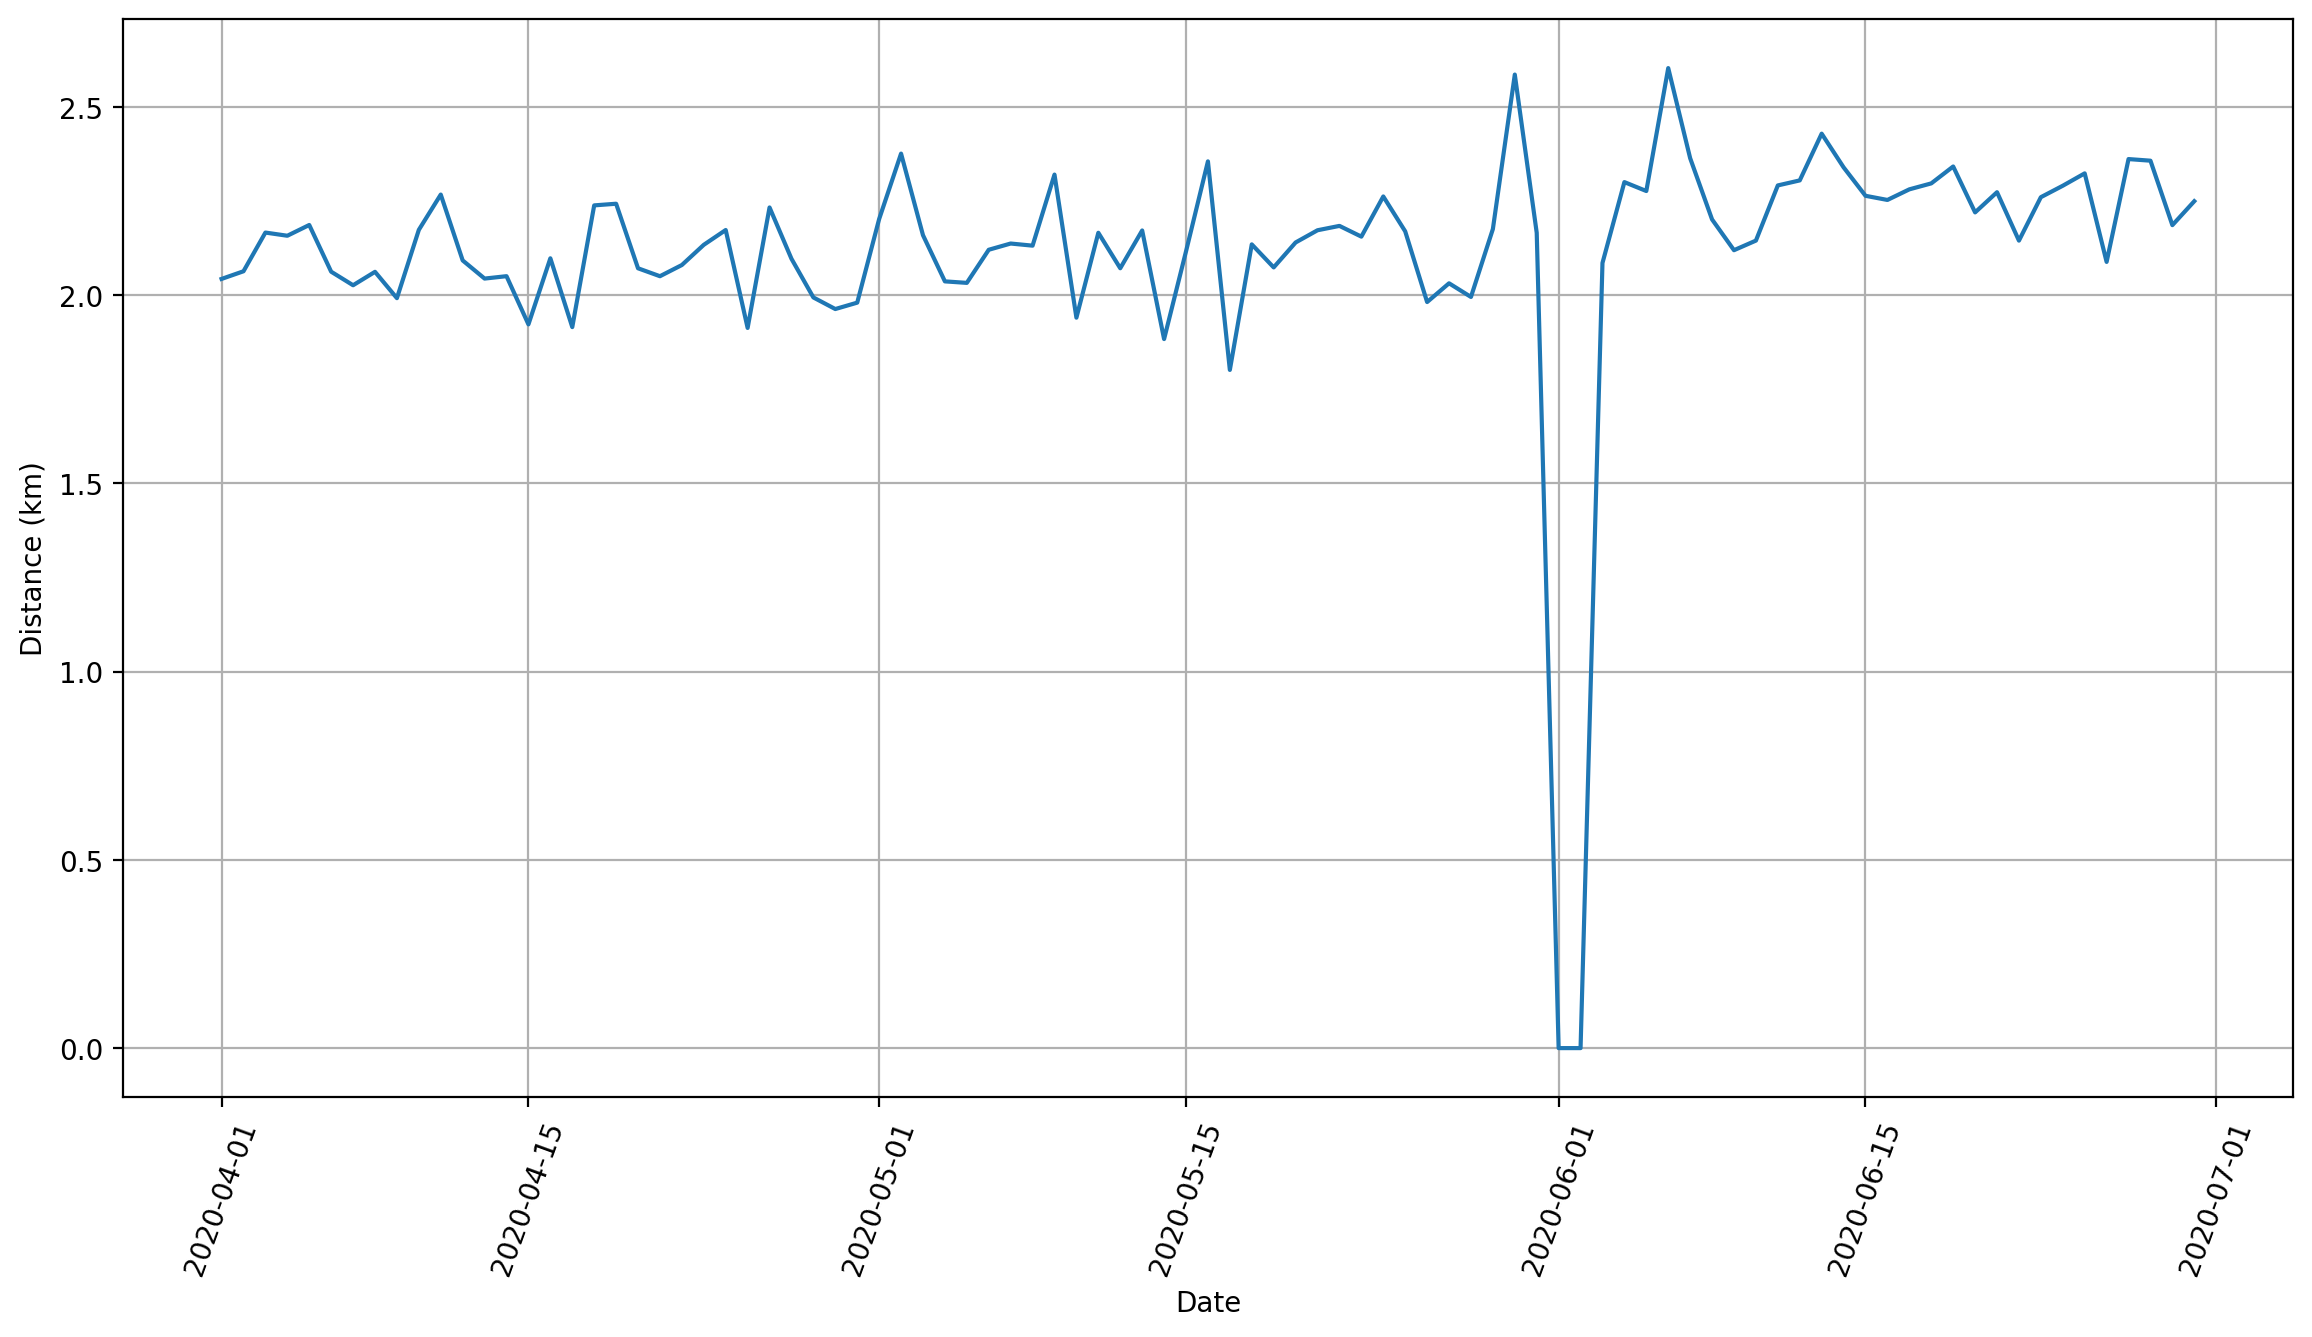

In [11]:
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


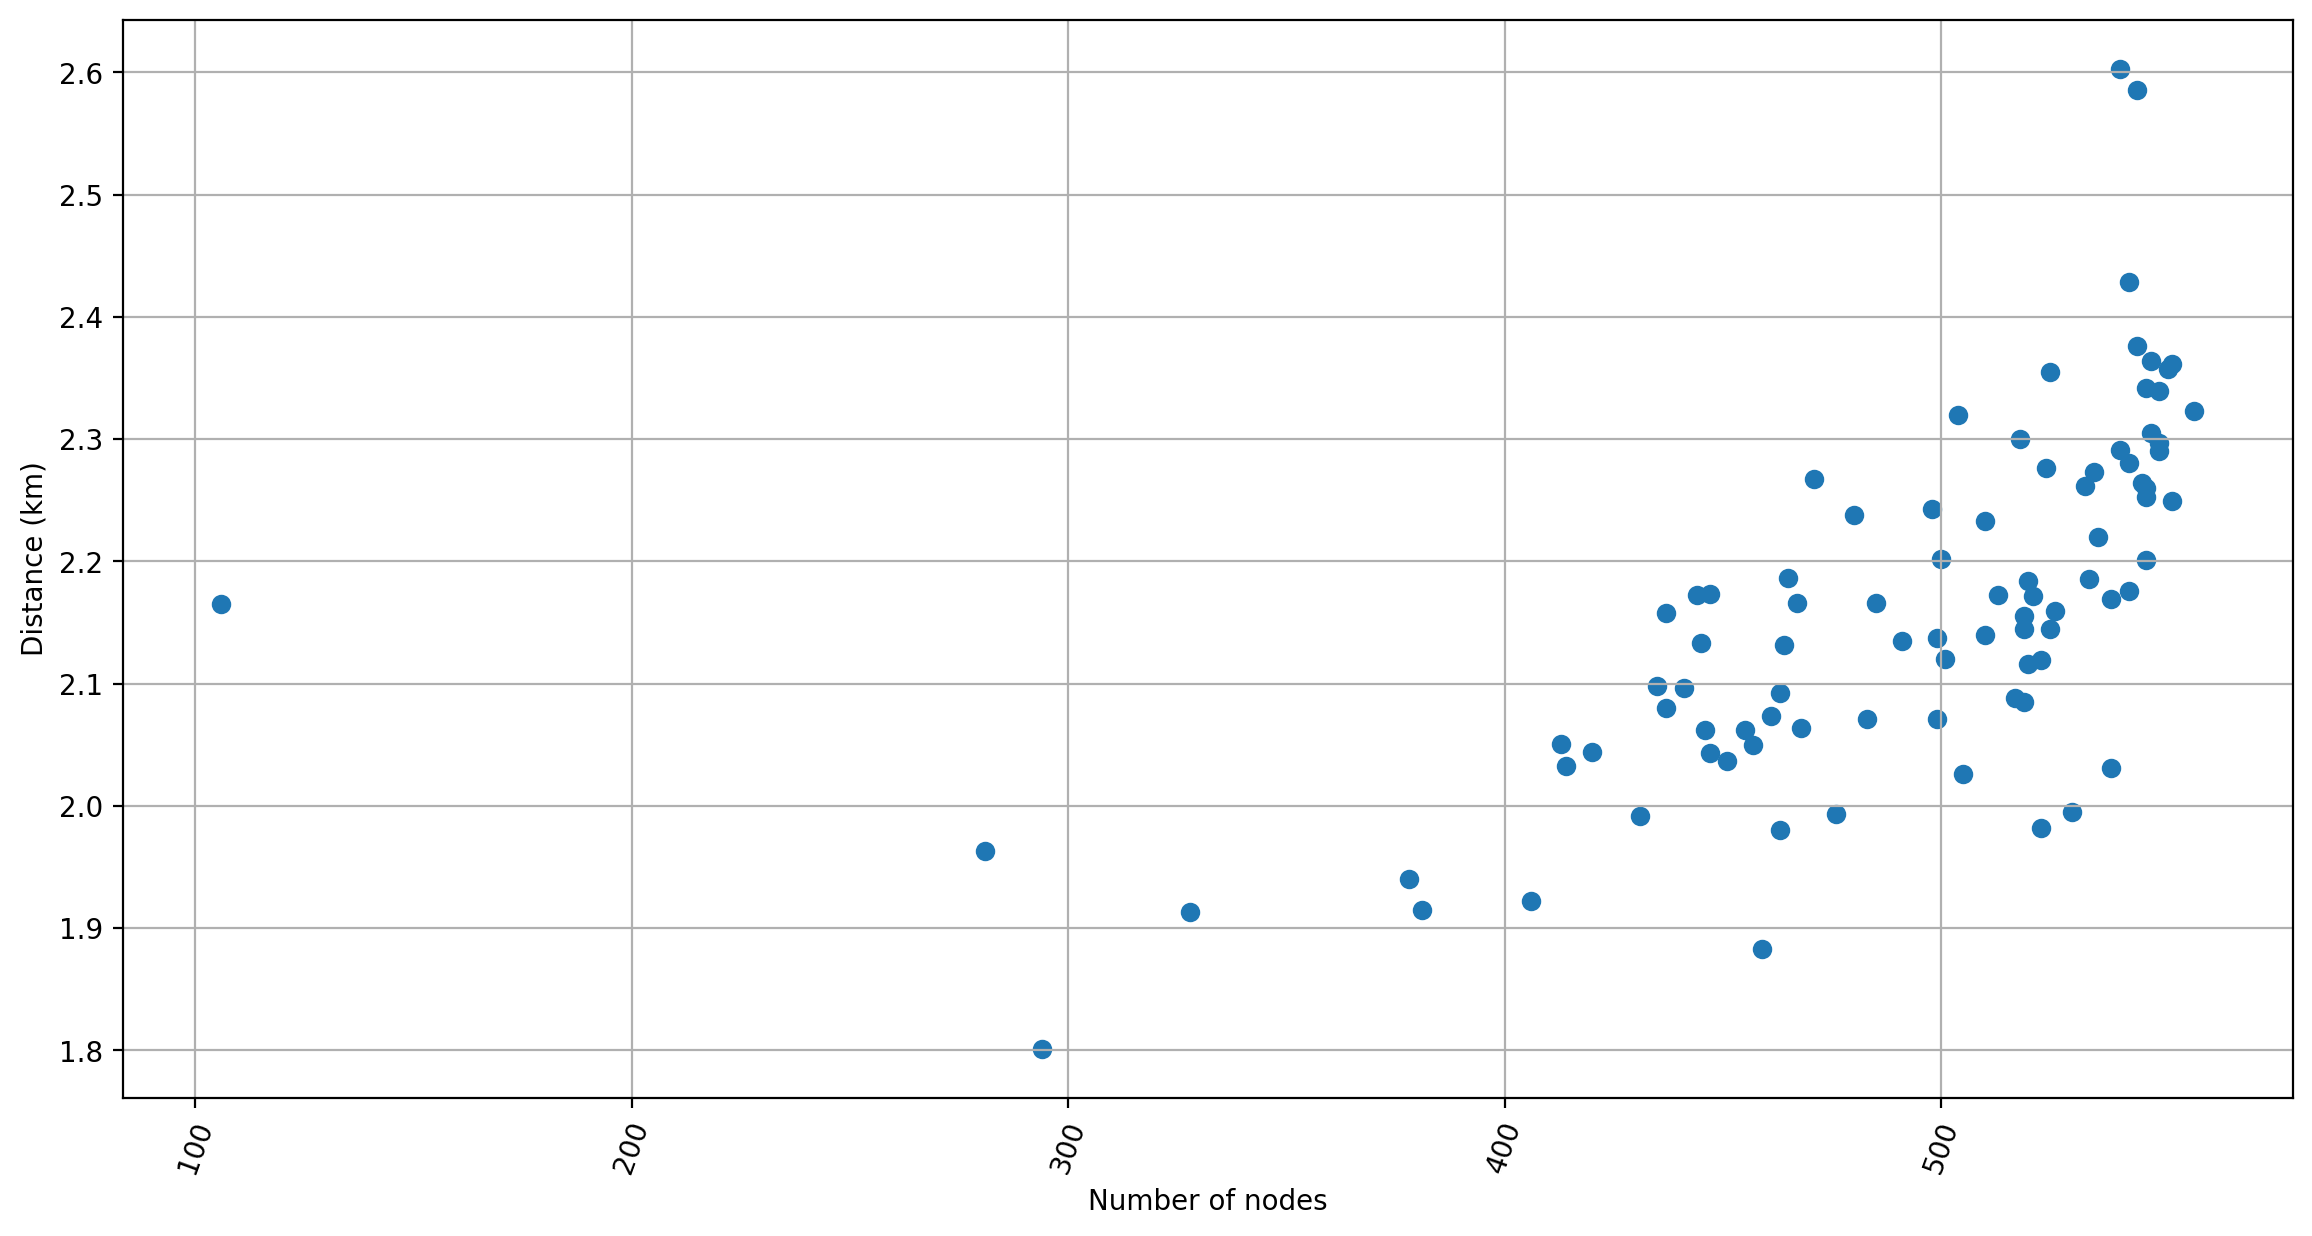

In [3]:
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    # Delete anything with 0 in it
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list, label="lockdown 1")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

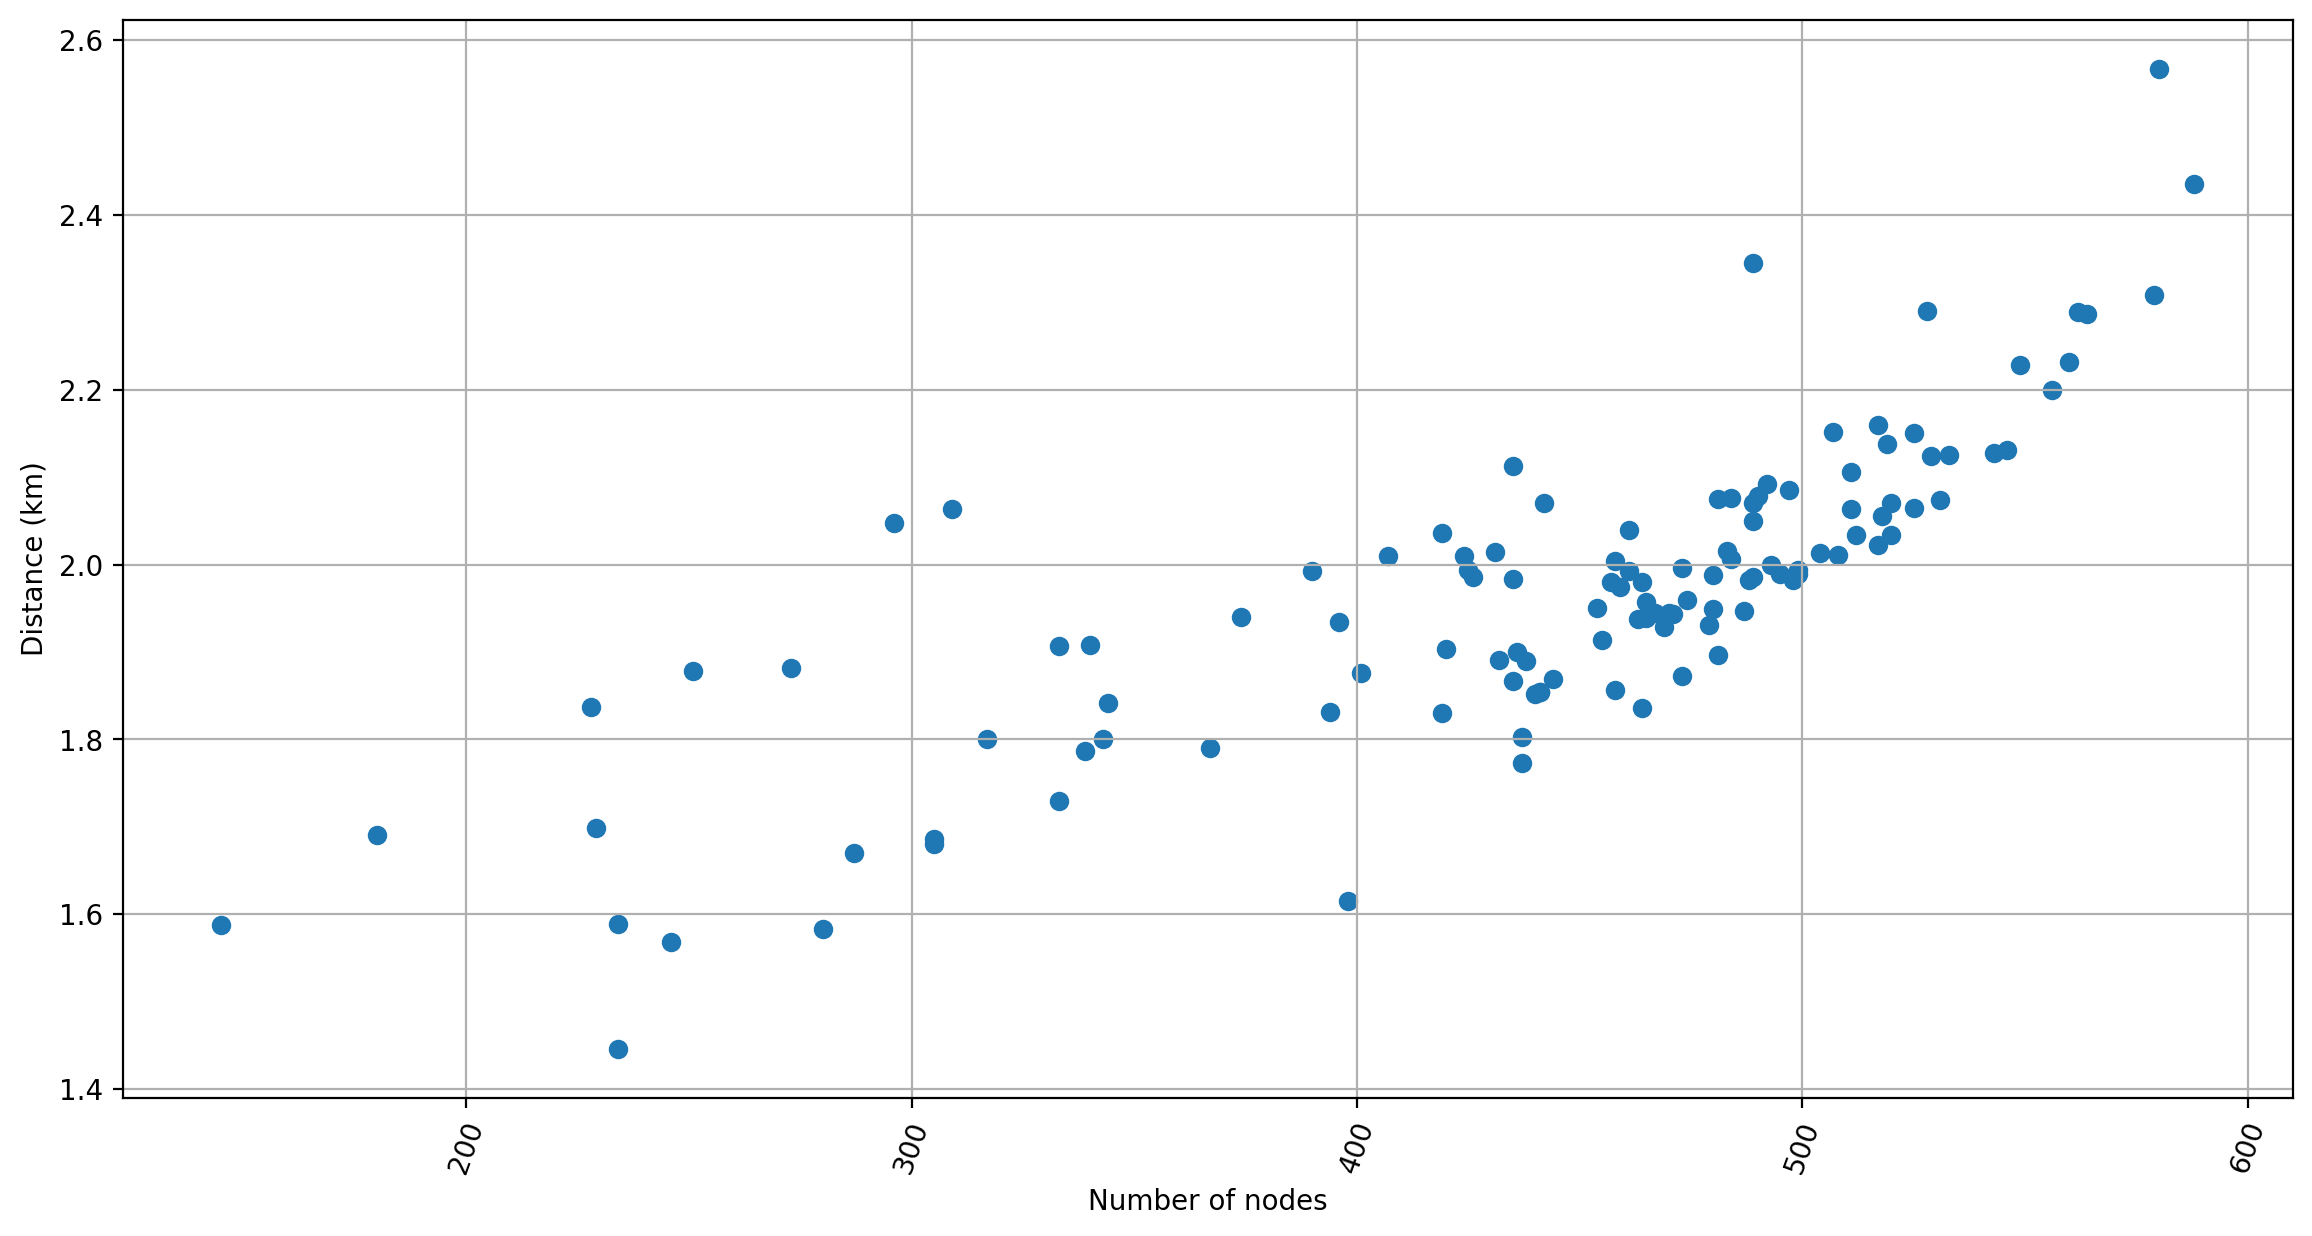

In [9]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

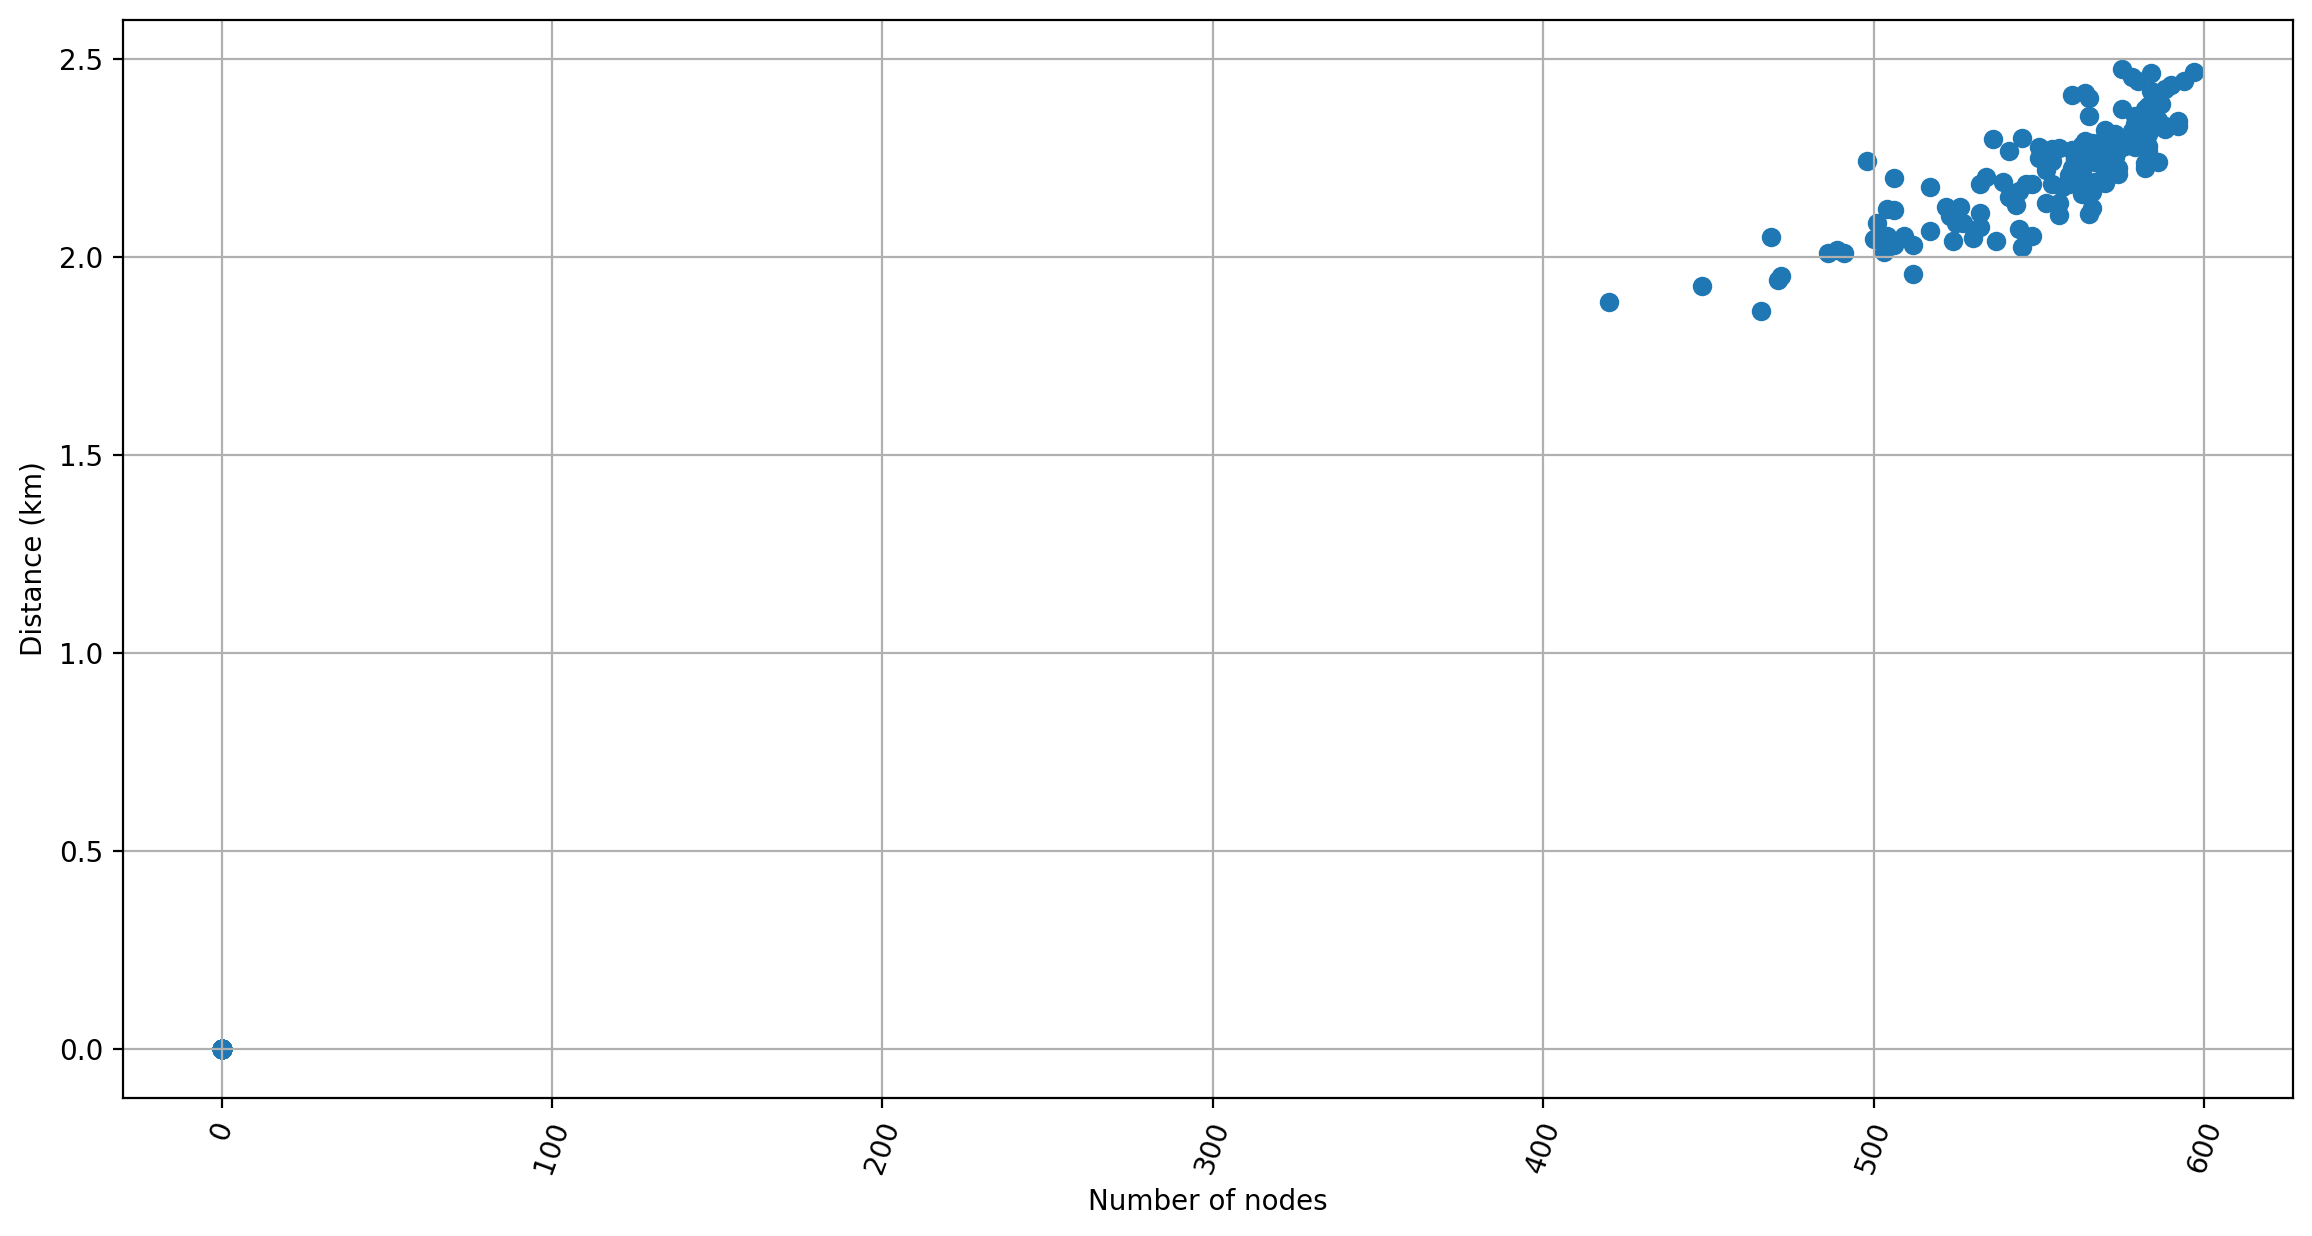

In [11]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

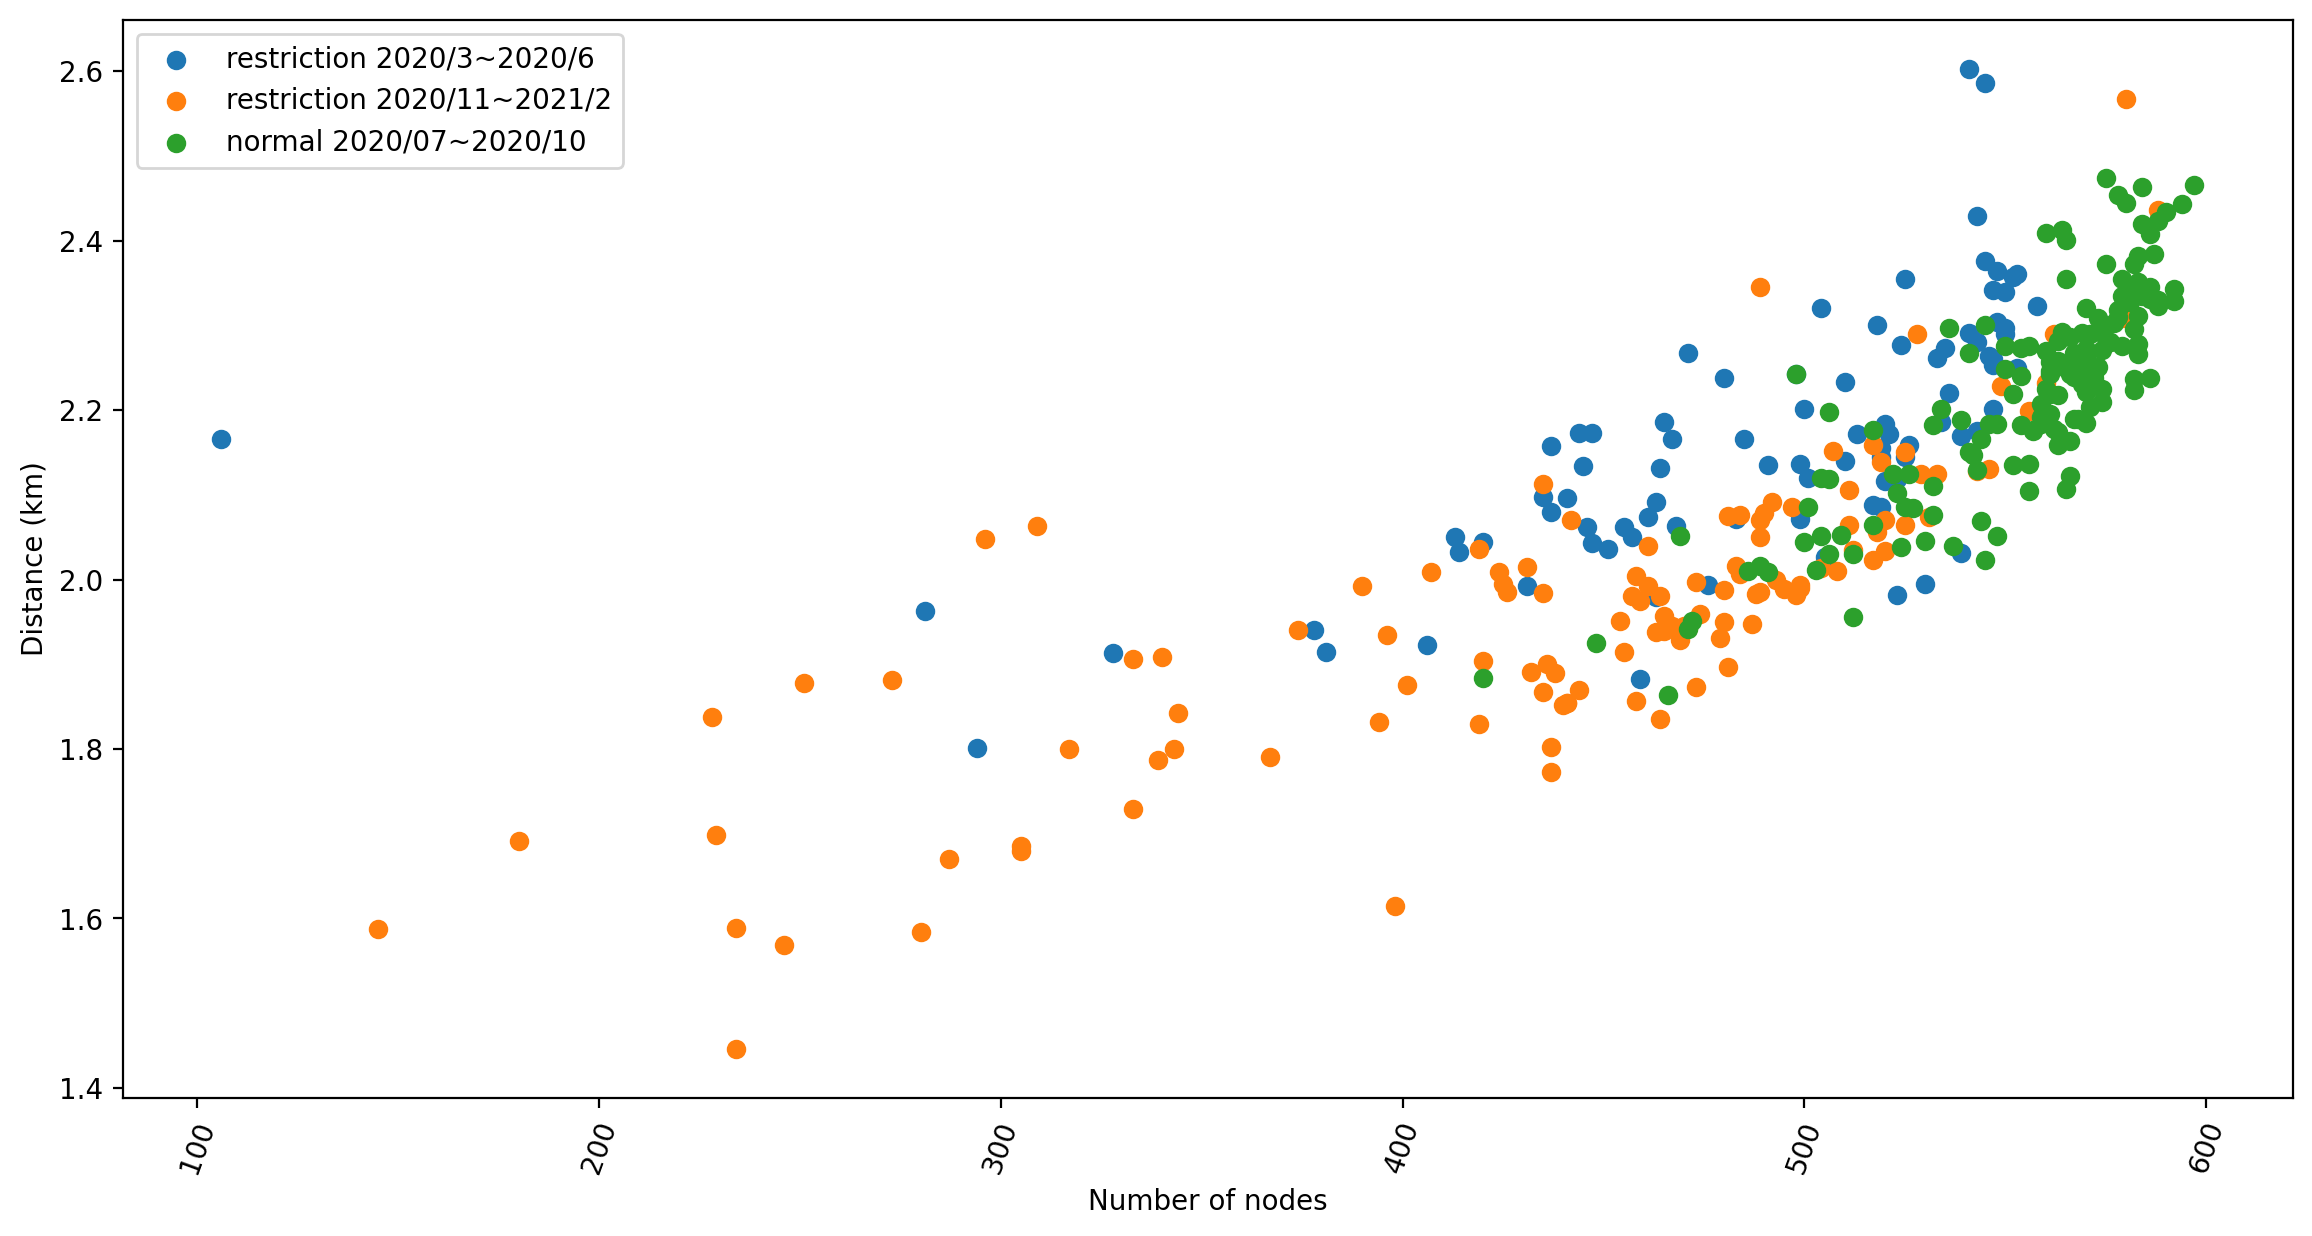

In [5]:
# Mix
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list2.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # distance_list2 = [x for x in distance_list2 if x != 0]

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list2.append(len(subset["start_station_name"].unique()))
    if node_list2[-1] == 0:
        node_list2.pop()

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list3.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    if distance_list3[-1] == 0:
        distance_list3.pop()

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list3.append(len(subset["start_station_name"].unique()))
    if node_list3[-1] == 0:
        node_list3.pop()

    # update timestamp
    current_timestamp = next_timestamp


plt.figure(figsize=(14,7))
plt.scatter(node_list, distance_list, label="restriction 2020/3~2020/6")
plt.scatter(node_list2, distance_list2, label="restriction 2020/11~2021/2")
plt.scatter(node_list3, distance_list3, label="normal 2020/07~2020/10")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()
plt.show()

In [6]:
# リファクタリングする
def return_nd(df):
  distance_list = []
  # current_timestampをdatetime型に変換する
  df["started_at"] = pd.to_datetime(df["started_at"])
  current_timestamp = df['started_at'].min()
  # end_timestampをdatetime型に変換する
  end_timestamp = pd.to_datetime(df["started_at"].max())
  end_timestamp = df["started_at"].max()
  interval = timedelta(days=1)

  while current_timestamp <= end_timestamp:
      # current timestamp plus interval
      next_timestamp = current_timestamp + interval

      # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
      subset = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

      # Add to new dataset
      distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
      # Delete anything with 0 in it
      if distance_list[-1] == 0:
          distance_list.pop()

      # update timestamp
      current_timestamp = next_timestamp

  # started_atを基に、一日ごとのノード数を計算してリストに入れる
  node_list = []
  # current_timestampをdatetime型に変換する
  df["started_at"] = pd.to_datetime(df["started_at"])
  current_timestamp = df['started_at'].min()
  # end_timestampをdatetime型に変換する
  end_timestamp = pd.to_datetime(df["started_at"].max())
  end_timestamp = df["started_at"].max()
  interval = timedelta(days=1)

  while current_timestamp <= end_timestamp:
      # current timestamp plus interval
      next_timestamp = current_timestamp + interval

      # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
      subset = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

      # Add to new dataset
      node_list.append(len(subset["start_station_name"].unique()))
      if node_list[-1] == 0:
          node_list.pop()

      # update timestamp
      current_timestamp = next_timestamp

  return node_list, distance_list

In [22]:
lockdown_nd = return_nd(df_lockdown1)
lockdown_nd2 = return_nd(df_lockdown2)
normal_nd = return_nd(df_normal)
print(lockdown_nd[1])

[2.0429417725731067, 2.0632854286088675, 2.1660747849001165, 2.1576372559658035, 2.186207067313815, 2.06214388375143, 2.026150298167821, 2.0617983771513853, 1.9918699729971232, 2.1732852444560966, 2.2669976009153885, 2.092100371963361, 2.0438764018910396, 2.0502492587736705, 1.9222351416592536, 2.0977286876090395, 1.9149494710513923, 2.2382751332418707, 2.242655029758495, 2.0711946200157896, 2.0501457859002663, 2.079890015283318, 2.1335554497667704, 2.1728772715271325, 1.9128055220313807, 2.2328040857080507, 2.0965273524006602, 1.993729522942942, 1.962971777229163, 1.9799511183237315, 2.2018979431224306, 2.375825731806014, 2.1591499506575462, 2.036433564508554, 2.032464996769109, 2.1203784075765575, 2.136964591849973, 2.131324028543082, 2.3201188835714692, 1.9400767691907348, 2.165536490801677, 2.0713180101519546, 2.171652973435308, 1.8831792087406642, 2.1160374901140067, 2.3551656436847517, 1.8012552902848642, 2.13470681684117, 2.073546709828677, 2.139772433918642, 2.1722238899094224,

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1080042550.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lockdown_nd[0], lockdown_nd[1], label="restriction 2020/3~2020/6", cmap="viridis", marker="o", s=15)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1080042550.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lockdown_nd2[0], lockdown_nd2[1], label="restriction 2020/11~2021/2", cmap="viridis", marker="s", s=15)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1080042550.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(normal_nd[0], normal_nd[1], label="normal 2020/07~2020/10", cmap="viridis", marker="D", s=15)


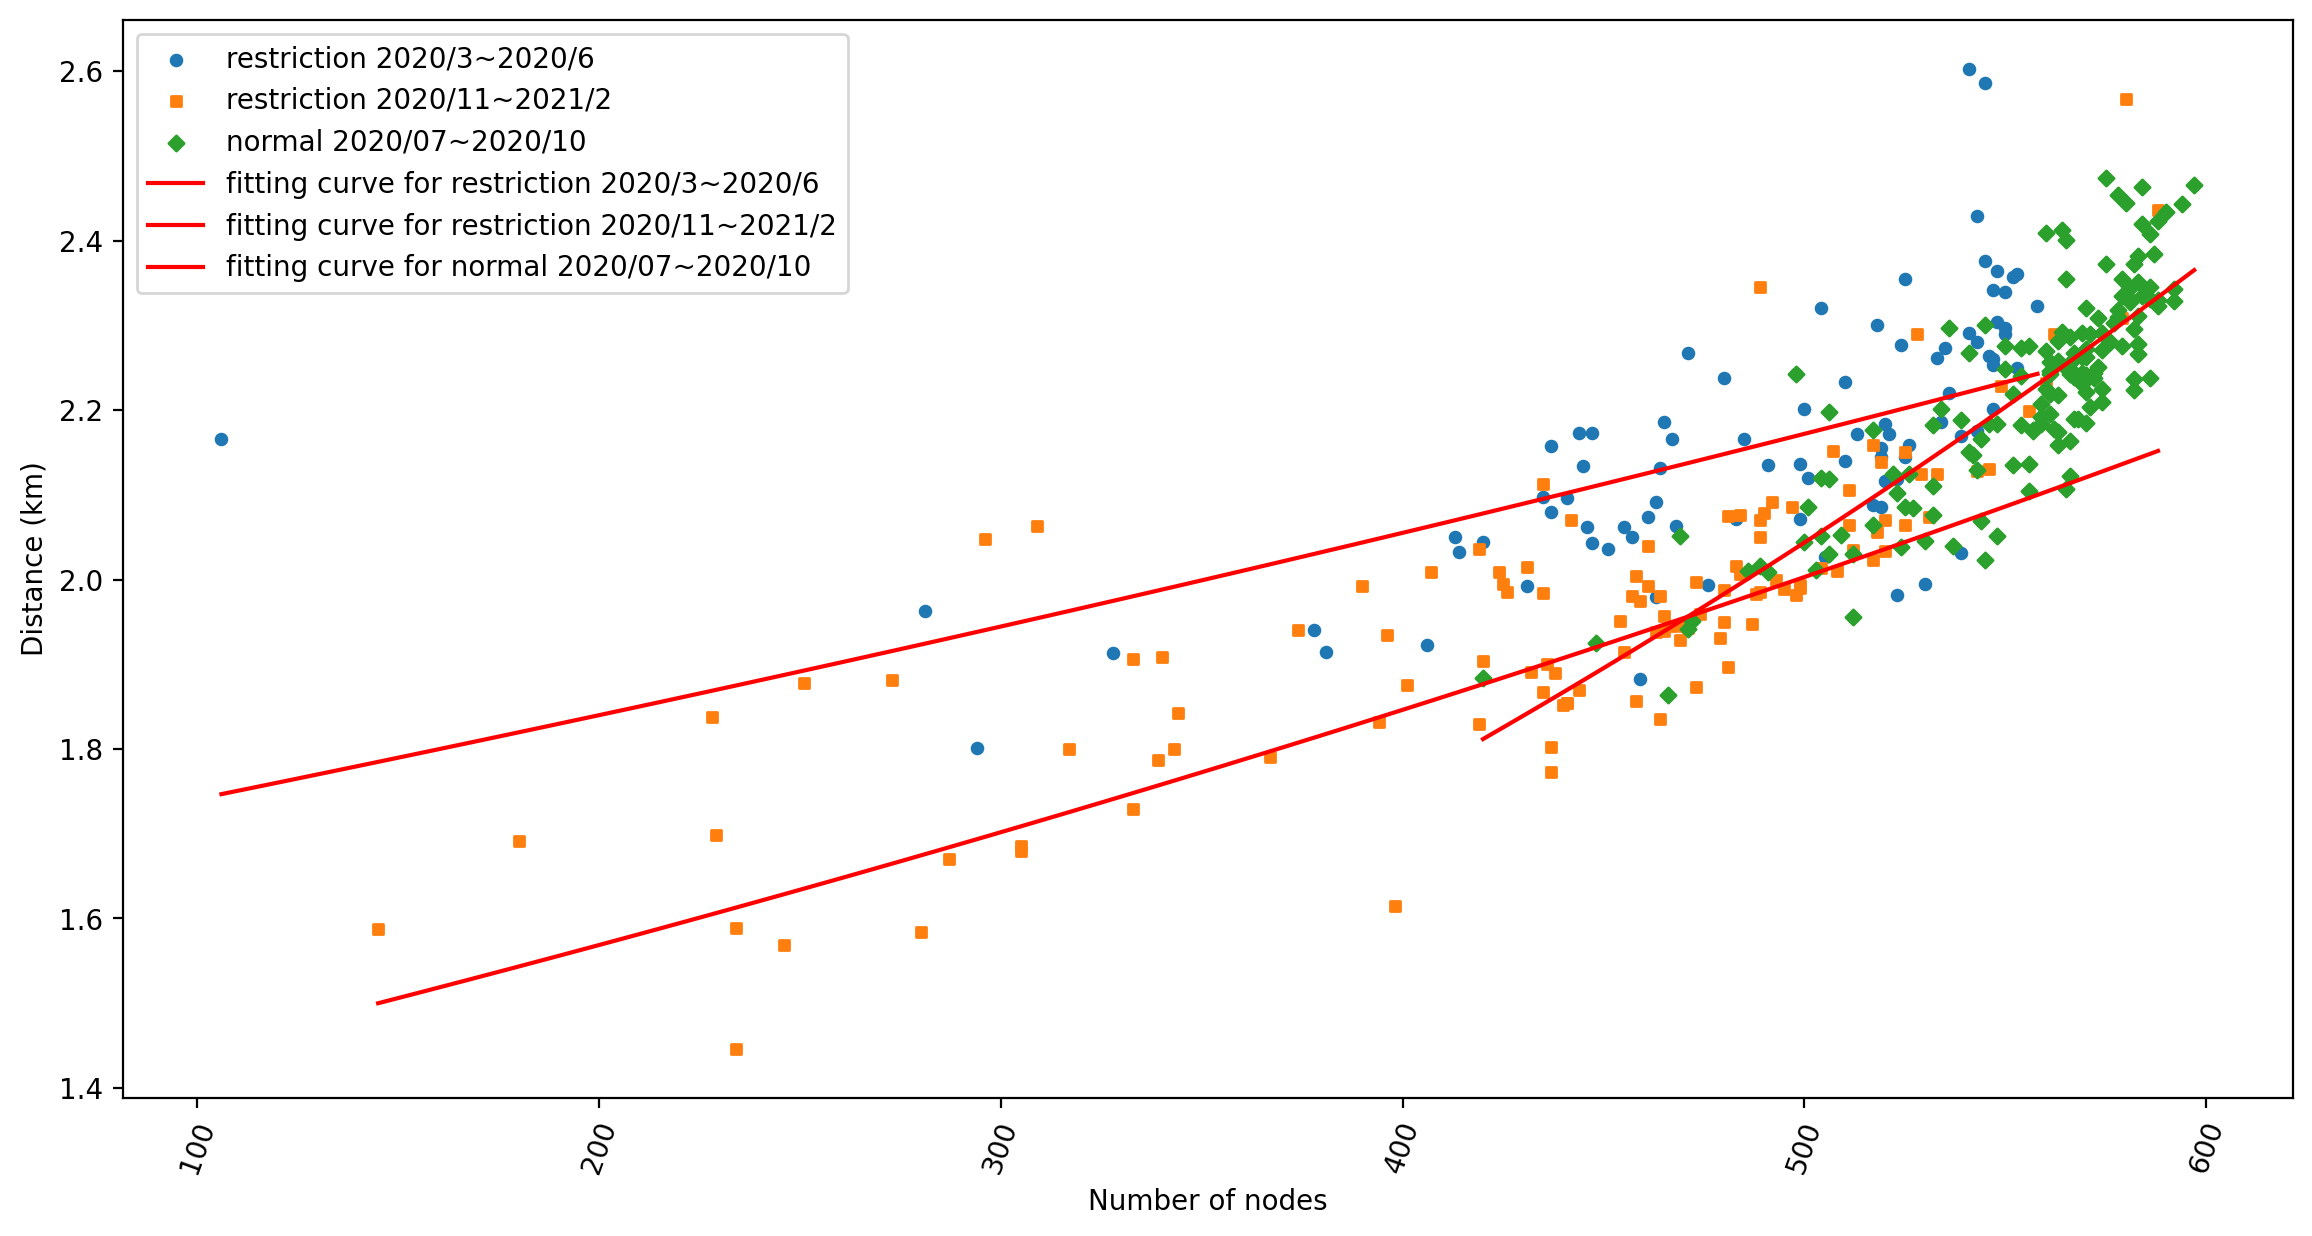

In [31]:
# lockdown_ndを近似曲線にフィットさせる
plt.figure(figsize=(14,7))
plt.scatter(lockdown_nd[0], lockdown_nd[1], label="restriction 2020/3~2020/6", cmap="viridis", marker="o", s=15)
plt.scatter(lockdown_nd2[0], lockdown_nd2[1], label="restriction 2020/11~2021/2", cmap="viridis", marker="s", s=15)
plt.scatter(normal_nd[0], normal_nd[1], label="normal 2020/07~2020/10", cmap="viridis", marker="D", s=15)

# Fit an exponential curve
coef = np.polyfit(lockdown_nd[0], np.log(lockdown_nd[1]), 1)
n_fit = np.linspace(min(lockdown_nd[0]), max(lockdown_nd[0]), 100)
d_ft = np.exp(coef[1]) * np.exp(coef[0]*n_fit)

coef2 = np.polyfit(lockdown_nd2[0], np.log(lockdown_nd2[1]), 1)
n_fit2 = np.linspace(min(lockdown_nd2[0]), max(lockdown_nd2[0]), 100)
d_ft2 = np.exp(coef2[1]) * np.exp(coef2[0]*n_fit)

coef3 = np.polyfit(normal_nd[0], np.log(normal_nd[1]), 1)
n_fit3= np.linspace(min(normal_nd[0]), max(normal_nd[0]), 100)
d_ft3 = np.exp(coef3[1]) * np.exp(coef3[0]*n_fit3)



plt.plot(n_fit, d_ft, 'r-', label="fitting curve for restriction 2020/3~2020/6")
plt.plot(n_fit2, d_ft2, 'r-', label="fitting curve for restriction 2020/11~2021/2")
plt.plot(n_fit3, d_ft3, 'r-', label="fitting curve for normal 2020/07~2020/10")

plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()

plt.show()

In [32]:
df_lockdown1.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14,3.981346
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54,0.979629
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13,2.984661
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19,2.141375
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59,9.119685


In [34]:
# ./data/*.csvを読み込んで、それぞれの距離を計算する
df_202203 = pd.read_csv("./data/csv_202203_202309/202203-divvy-tripdata.csv")
df_202204 = pd.read_csv("./data/csv_202203_202309/202204-divvy-tripdata.csv")
df_202205 = pd.read_csv("./data/csv_202203_202309/202205-divvy-tripdata.csv")
df_202206 = pd.read_csv("./data/csv_202203_202309/202206-divvy-tripdata.csv")
df_202207 = pd.read_csv("./data/csv_202203_202309/202207-divvy-tripdata.csv")
df_202208 = pd.read_csv("./data/csv_202203_202309/202208-divvy-tripdata.csv")
df_202209 = pd.read_csv("./data/csv_202203_202309/202209-divvy-tripdata.csv")
df_202210 = pd.read_csv("./data/csv_202203_202309/202210-divvy-tripdata.csv")
df_202211 = pd.read_csv("./data/csv_202203_202309/202211-divvy-tripdata.csv")
df_202212 = pd.read_csv("./data/csv_202203_202309/202212-divvy-tripdata.csv")
df_202301 = pd.read_csv("./data/csv_202203_202309/202301-divvy-tripdata.csv")
df_202302 = pd.read_csv("./data/csv_202203_202309/202302-divvy-tripdata.csv")
df_202303 = pd.read_csv("./data/csv_202203_202309/202303-divvy-tripdata.csv")
df_202304 = pd.read_csv("./data/csv_202203_202309/202304-divvy-tripdata.csv")
df_202305 = pd.read_csv("./data/csv_202203_202309/202305-divvy-tripdata.csv")
df_202306 = pd.read_csv("./data/csv_202203_202309/202306-divvy-tripdata.csv")
df_202307 = pd.read_csv("./data/csv_202203_202309/202307-divvy-tripdata.csv")
df_202308 = pd.read_csv("./data/csv_202203_202309/202308-divvy-tripdata.csv")
df_202309 = pd.read_csv("./data/csv_202203_202309/202309-divvy-tripdata.csv")


In [35]:
df_202203.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [36]:
# locationで欠損値があったら削除する
df_202203 = df_202203.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202204 = df_202204.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202205 = df_202205.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202206 = df_202206.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202207 = df_202207.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202208 = df_202208.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202209 = df_202209.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202210 = df_202210.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202211 = df_202211.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202212 = df_202212.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202301 = df_202301.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202302 = df_202302.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202303 = df_202303.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202304 = df_202304.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202305 = df_202305.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202306 = df_202306.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202307 = df_202307.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202308 = df_202308.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])
df_202309 = df_202309.dropna(subset=["start_lat", "start_lng", "end_lat", "end_lng"])

# locationを使って距離を計算する
df_202203["distance"] = df_202203.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202204["distance"] = df_202204.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202205["distance"] = df_202205.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202206["distance"] = df_202206.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202207["distance"] = df_202207.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202208["distance"] = df_202208.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202209["distance"] = df_202209.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202210["distance"] = df_202210.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202211["distance"] = df_202211.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202212["distance"] = df_202212.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202301["distance"] = df_202301.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202302["distance"] = df_202302.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202303["distance"] = df_202303.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202304["distance"] = df_202304.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202305["distance"] = df_202305.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202306["distance"] = df_202306.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202307["distance"] = df_202307.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202308["distance"] = df_202308.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)
df_202309["distance"] = df_202309.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])).km, axis=1)

In [38]:
# df_202203からdf_202309を1つのデータフレームにまとめる
df_202203_202309 = pd.concat([df_202203, df_202204, df_202205, df_202206, df_202207, df_202208, df_202209, df_202210, df_202211, df_202212, df_202301, df_202302, df_202303, df_202304, df_202305, df_202306, df_202307, df_202308, df_202309], ignore_index=True)
df_202203_202309.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,1.066535
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,1.185206
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member,0.633656
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member,1.277286
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member,4.754938


In [40]:
df_202203_202309.to_csv("./data/csv_202203_202309/202203_202309-divvy-tripdata.csv", index=False)

In [41]:
df_202203_202309_nd = return_nd(df_202203_202309)

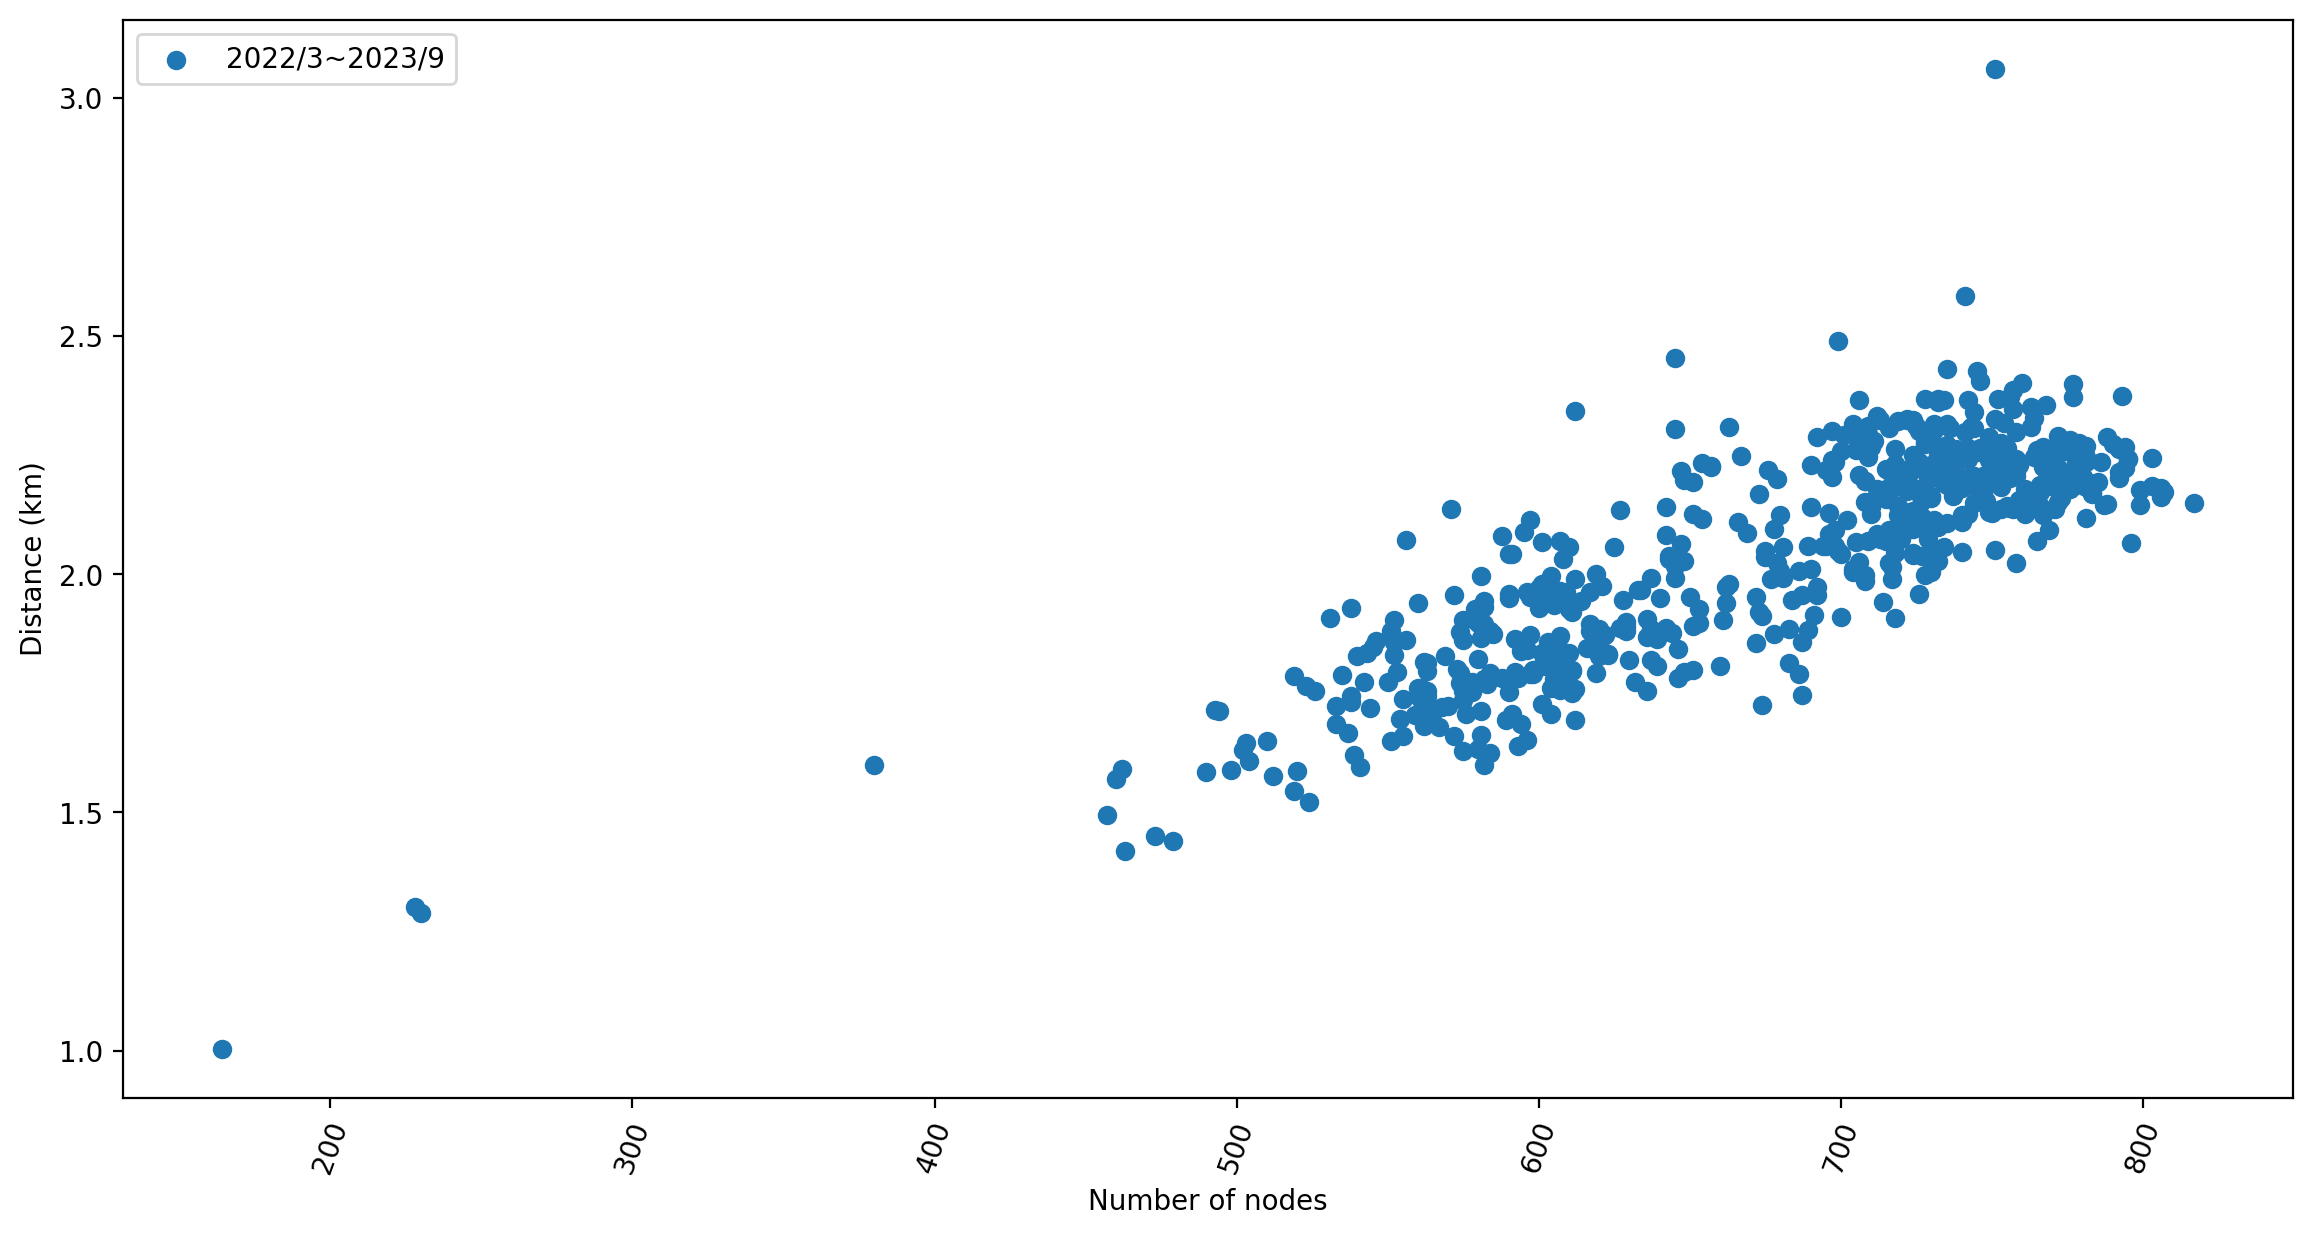

In [58]:
# Mix
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_202203_202309["started_at"] = pd.to_datetime(df_202203_202309["started_at"])
current_timestamp = df_202203_202309['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_202203_202309["started_at"].max())
end_timestamp = df_202203_202309["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_202203_202309[(df_202203_202309['started_at'] >= current_timestamp) & (df_202203_202309['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# distance_listの最大値を削除する
distance_list.remove(max(distance_list))


# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_202203_202309["started_at"] = pd.to_datetime(df_202203_202309["started_at"])
current_timestamp = df_202203_202309['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_202203_202309["started_at"].max())
end_timestamp = df_202203_202309["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_202203_202309[(df_202203_202309['started_at'] >= current_timestamp) & (df_202203_202309['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# node_listの最大値を削除する
node_list.remove(max(node_list))



plt.figure(figsize=(14,7))
plt.scatter(node_list, distance_list, label="2022/3~2023/9")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()
plt.show()

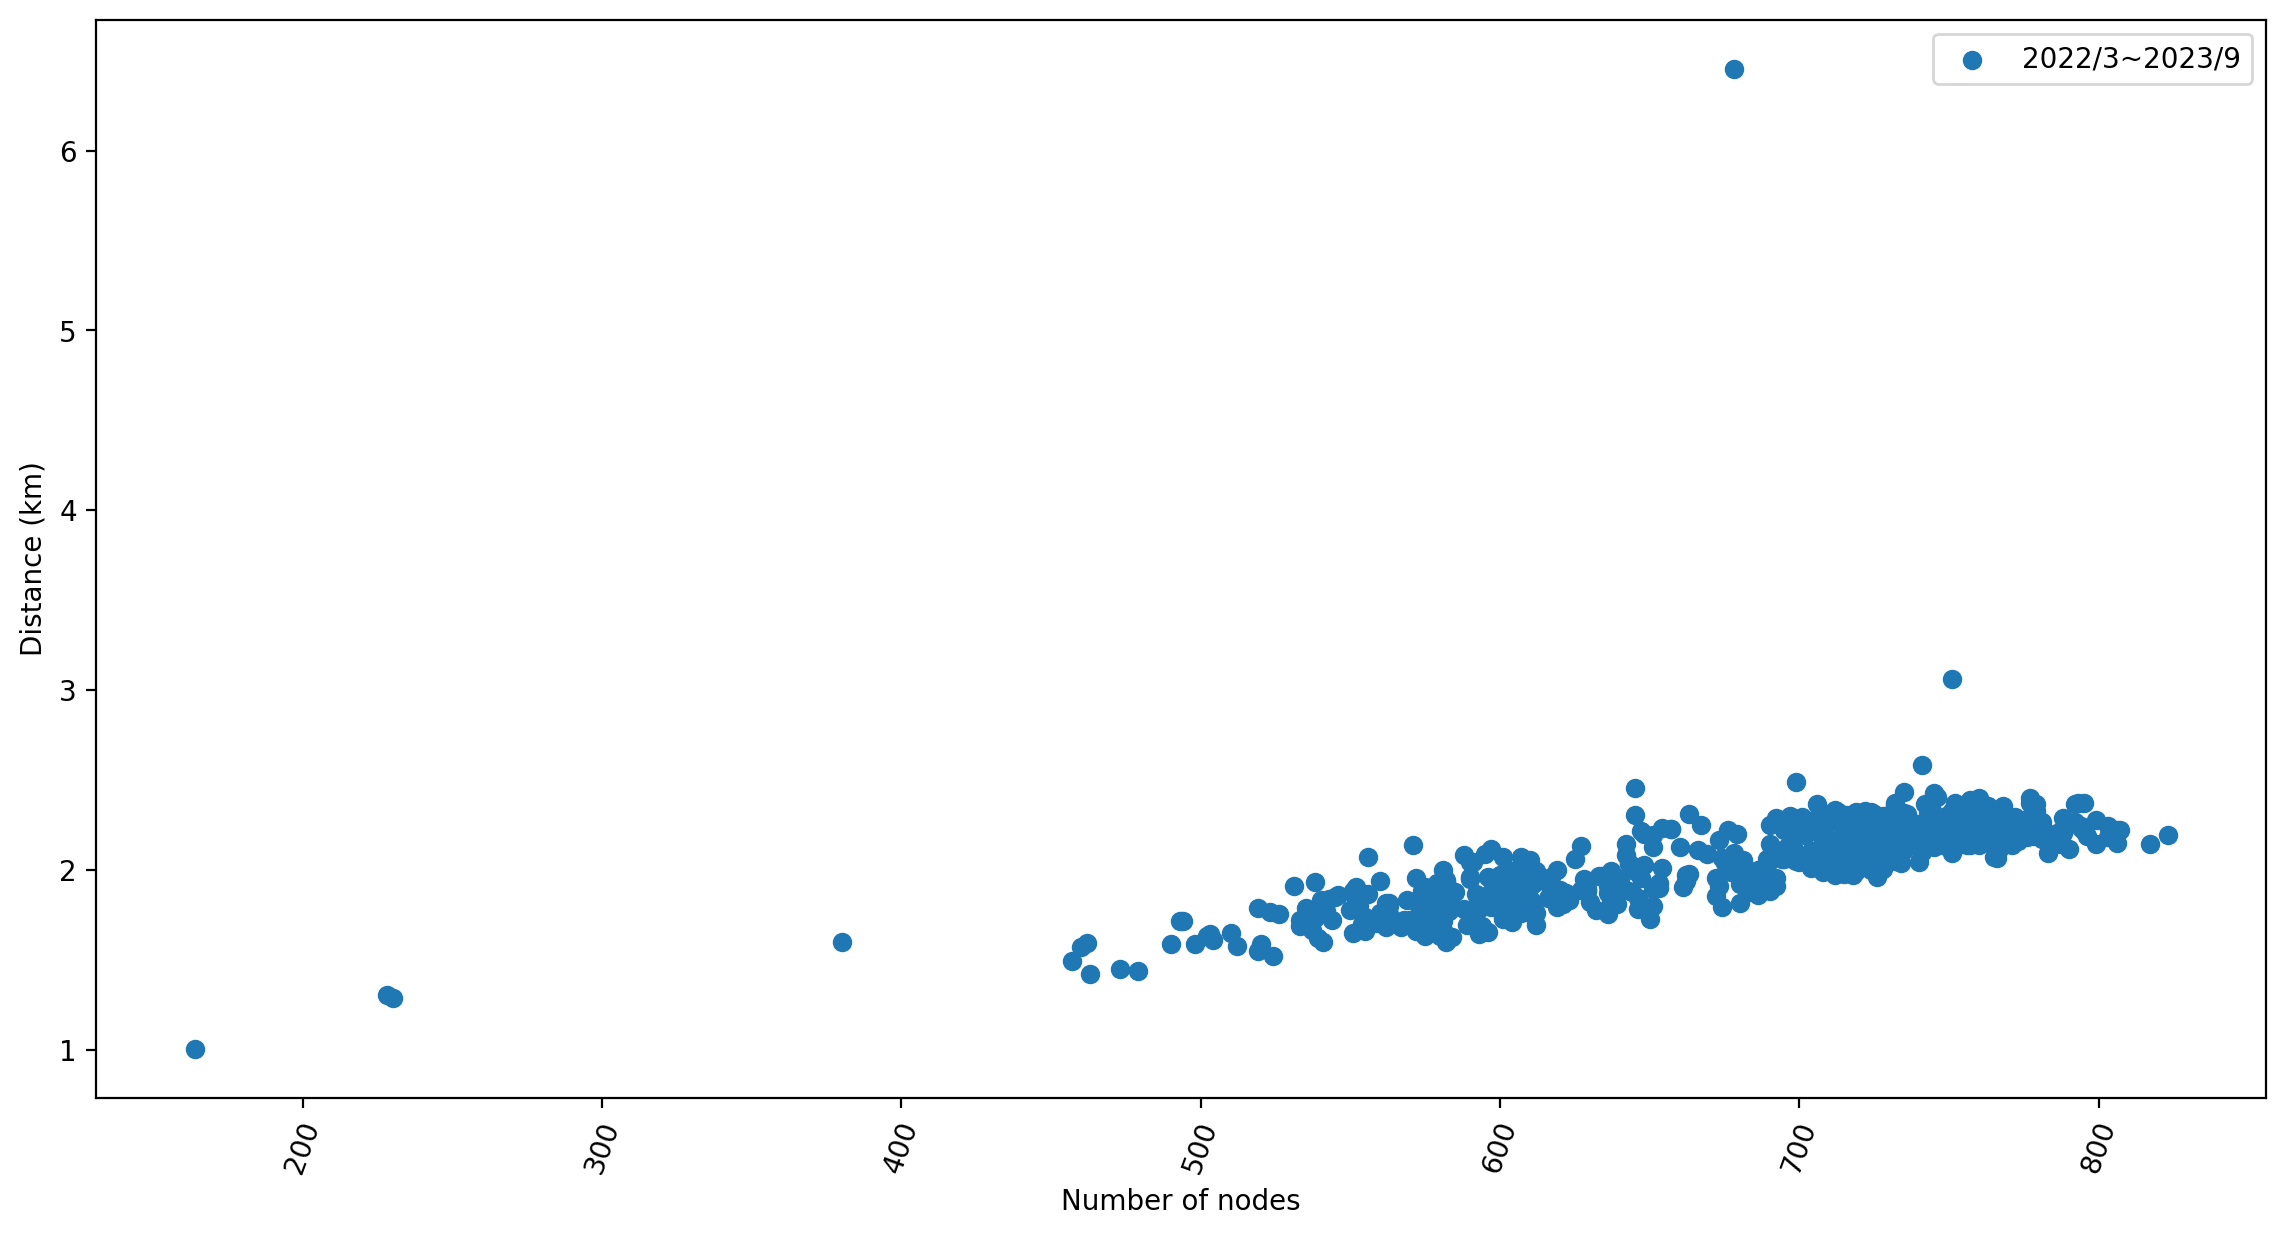

In [59]:
# Mix
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_202203_202309["started_at"] = pd.to_datetime(df_202203_202309["started_at"])
current_timestamp = df_202203_202309['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_202203_202309["started_at"].max())
end_timestamp = df_202203_202309["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_202203_202309[(df_202203_202309['started_at'] >= current_timestamp) & (df_202203_202309['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # Delete anything with 0 in it
    if distance_list[-1] == 0:
        distance_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# distance_listの最大値を削除する
# distance_list.remove(max(distance_list))


# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_202203_202309["started_at"] = pd.to_datetime(df_202203_202309["started_at"])
current_timestamp = df_202203_202309['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_202203_202309["started_at"].max())
end_timestamp = df_202203_202309["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_202203_202309[(df_202203_202309['started_at'] >= current_timestamp) & (df_202203_202309['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    if node_list[-1] == 0:
        node_list.pop()

    # update timestamp
    current_timestamp = next_timestamp

# node_listの最大値を削除する
# node_list.remove(max(node_list))



plt.figure(figsize=(14,7))
plt.scatter(node_list, distance_list, label="2022/3~2023/9")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()
plt.show()

In [43]:
max(node_list)

823

In [44]:
df_202203_202309.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,1.066535
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,1.185206
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member,0.633656
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member,1.277286
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member,4.754938


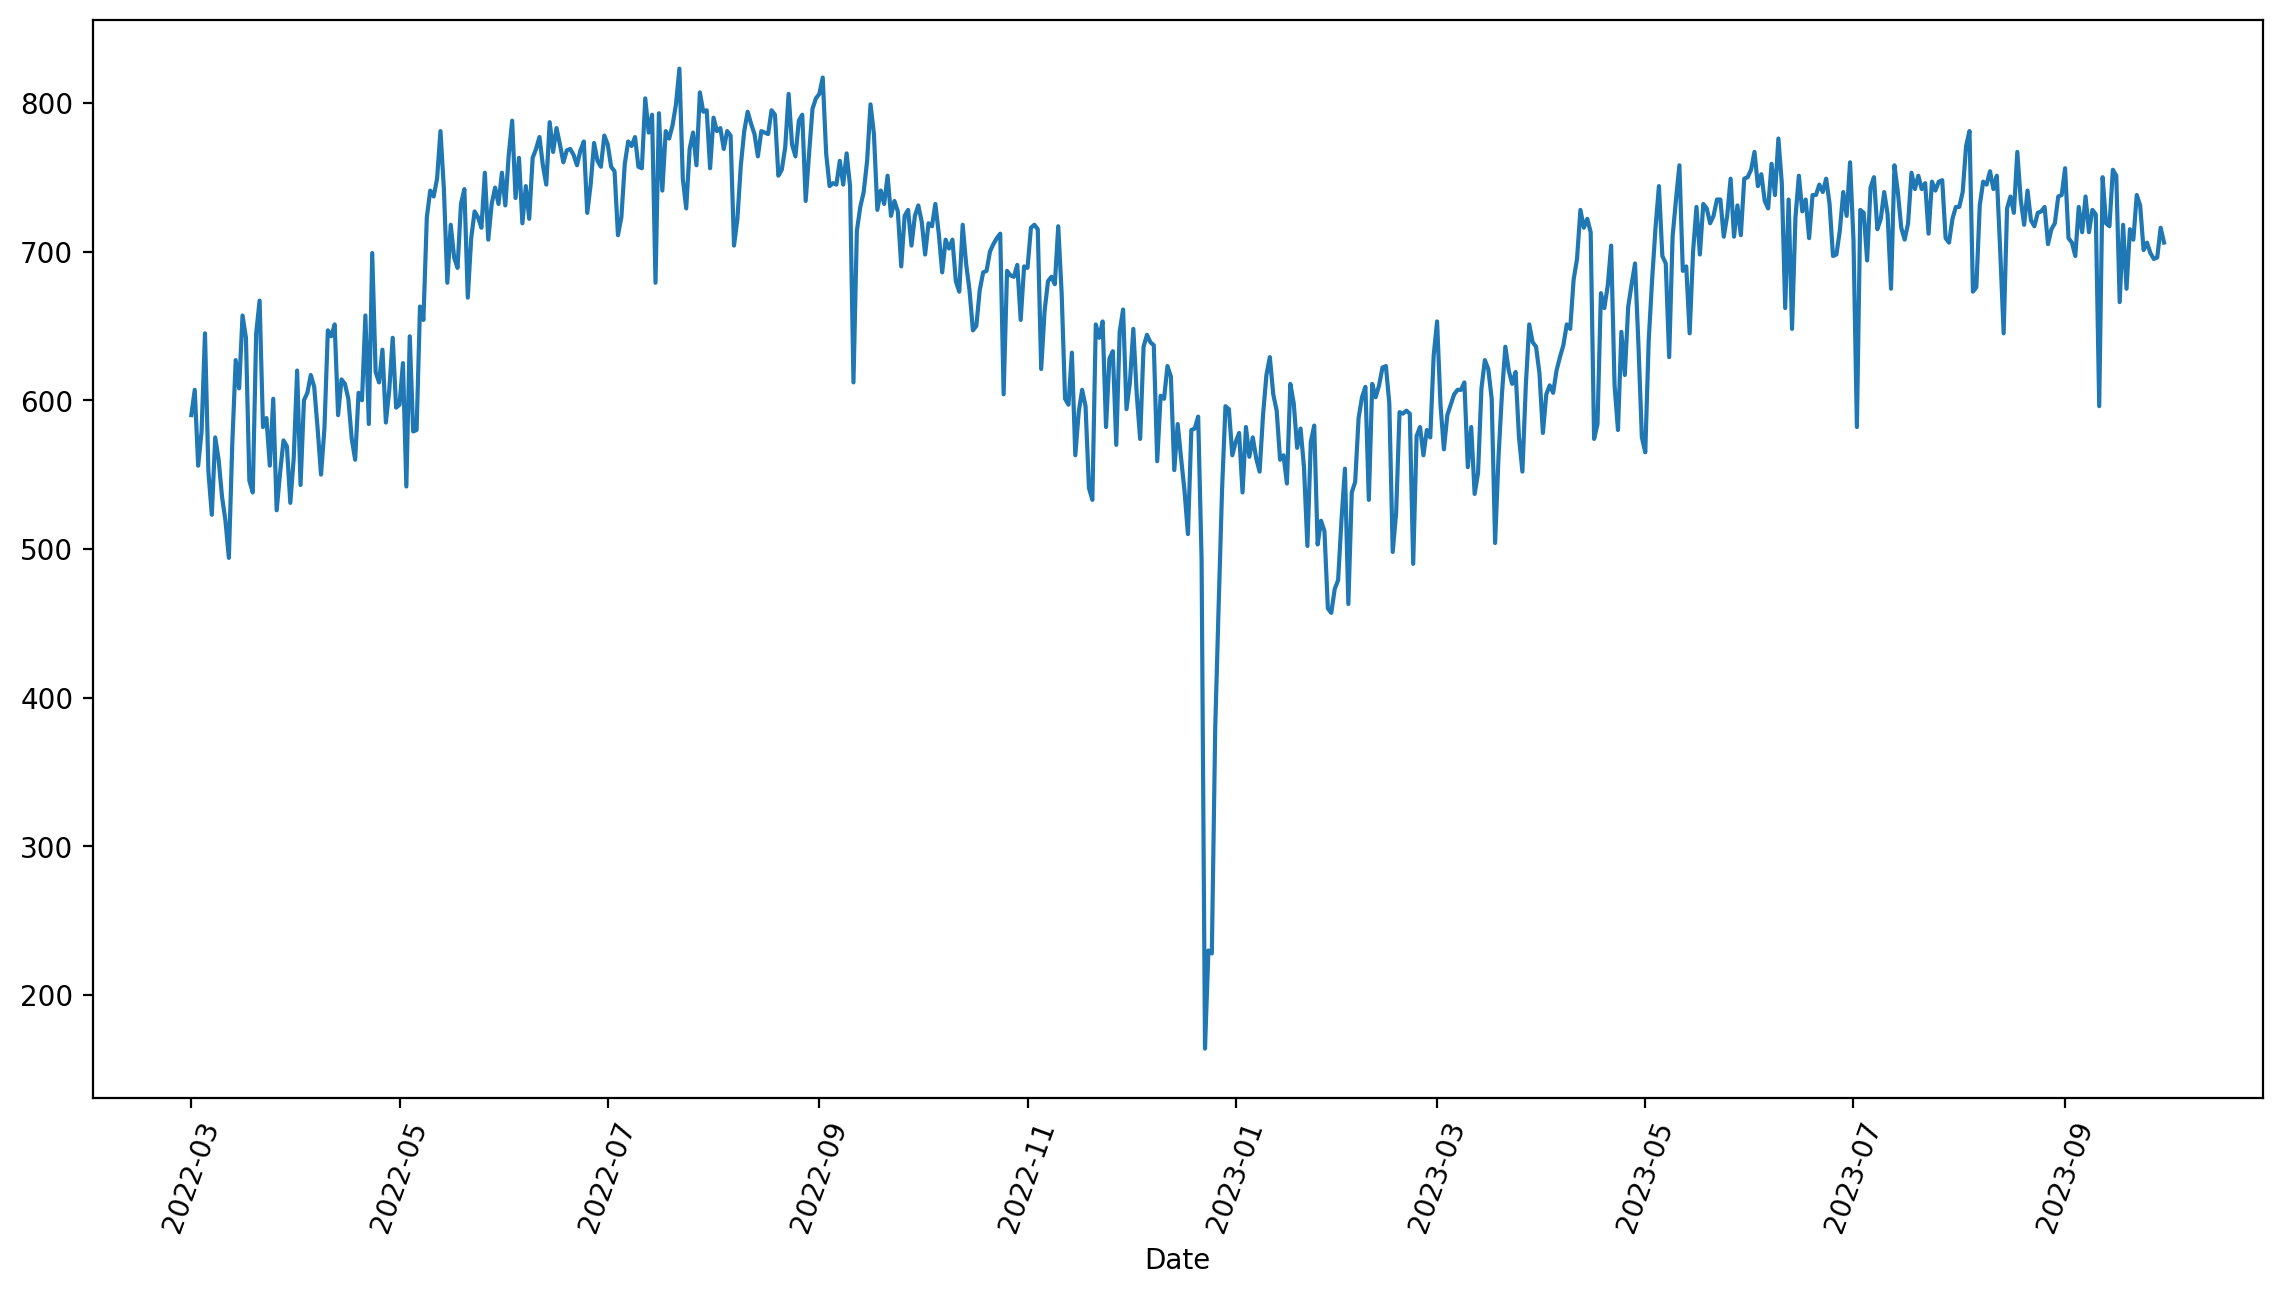

In [47]:
# 一日毎にノード数をプロットする
# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_202203_202309["started_at"] = pd.to_datetime(df_202203_202309["started_at"])
current_timestamp = df_202203_202309['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_202203_202309["started_at"].max())
end_timestamp = df_202203_202309["started_at"].max()
interval = timedelta(days=1)
date_list = []

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_202203_202309[(df_202203_202309['started_at'] >= current_timestamp) & (df_202203_202309['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))
    date_list.append(current_timestamp)

    # update timestamp
    current_timestamp = next_timestamp

plt.figure(figsize=(14,7))
plt.plot(date_list, node_list)
plt.xticks(rotation=70)
plt.xlabel("Date")

plt.show()

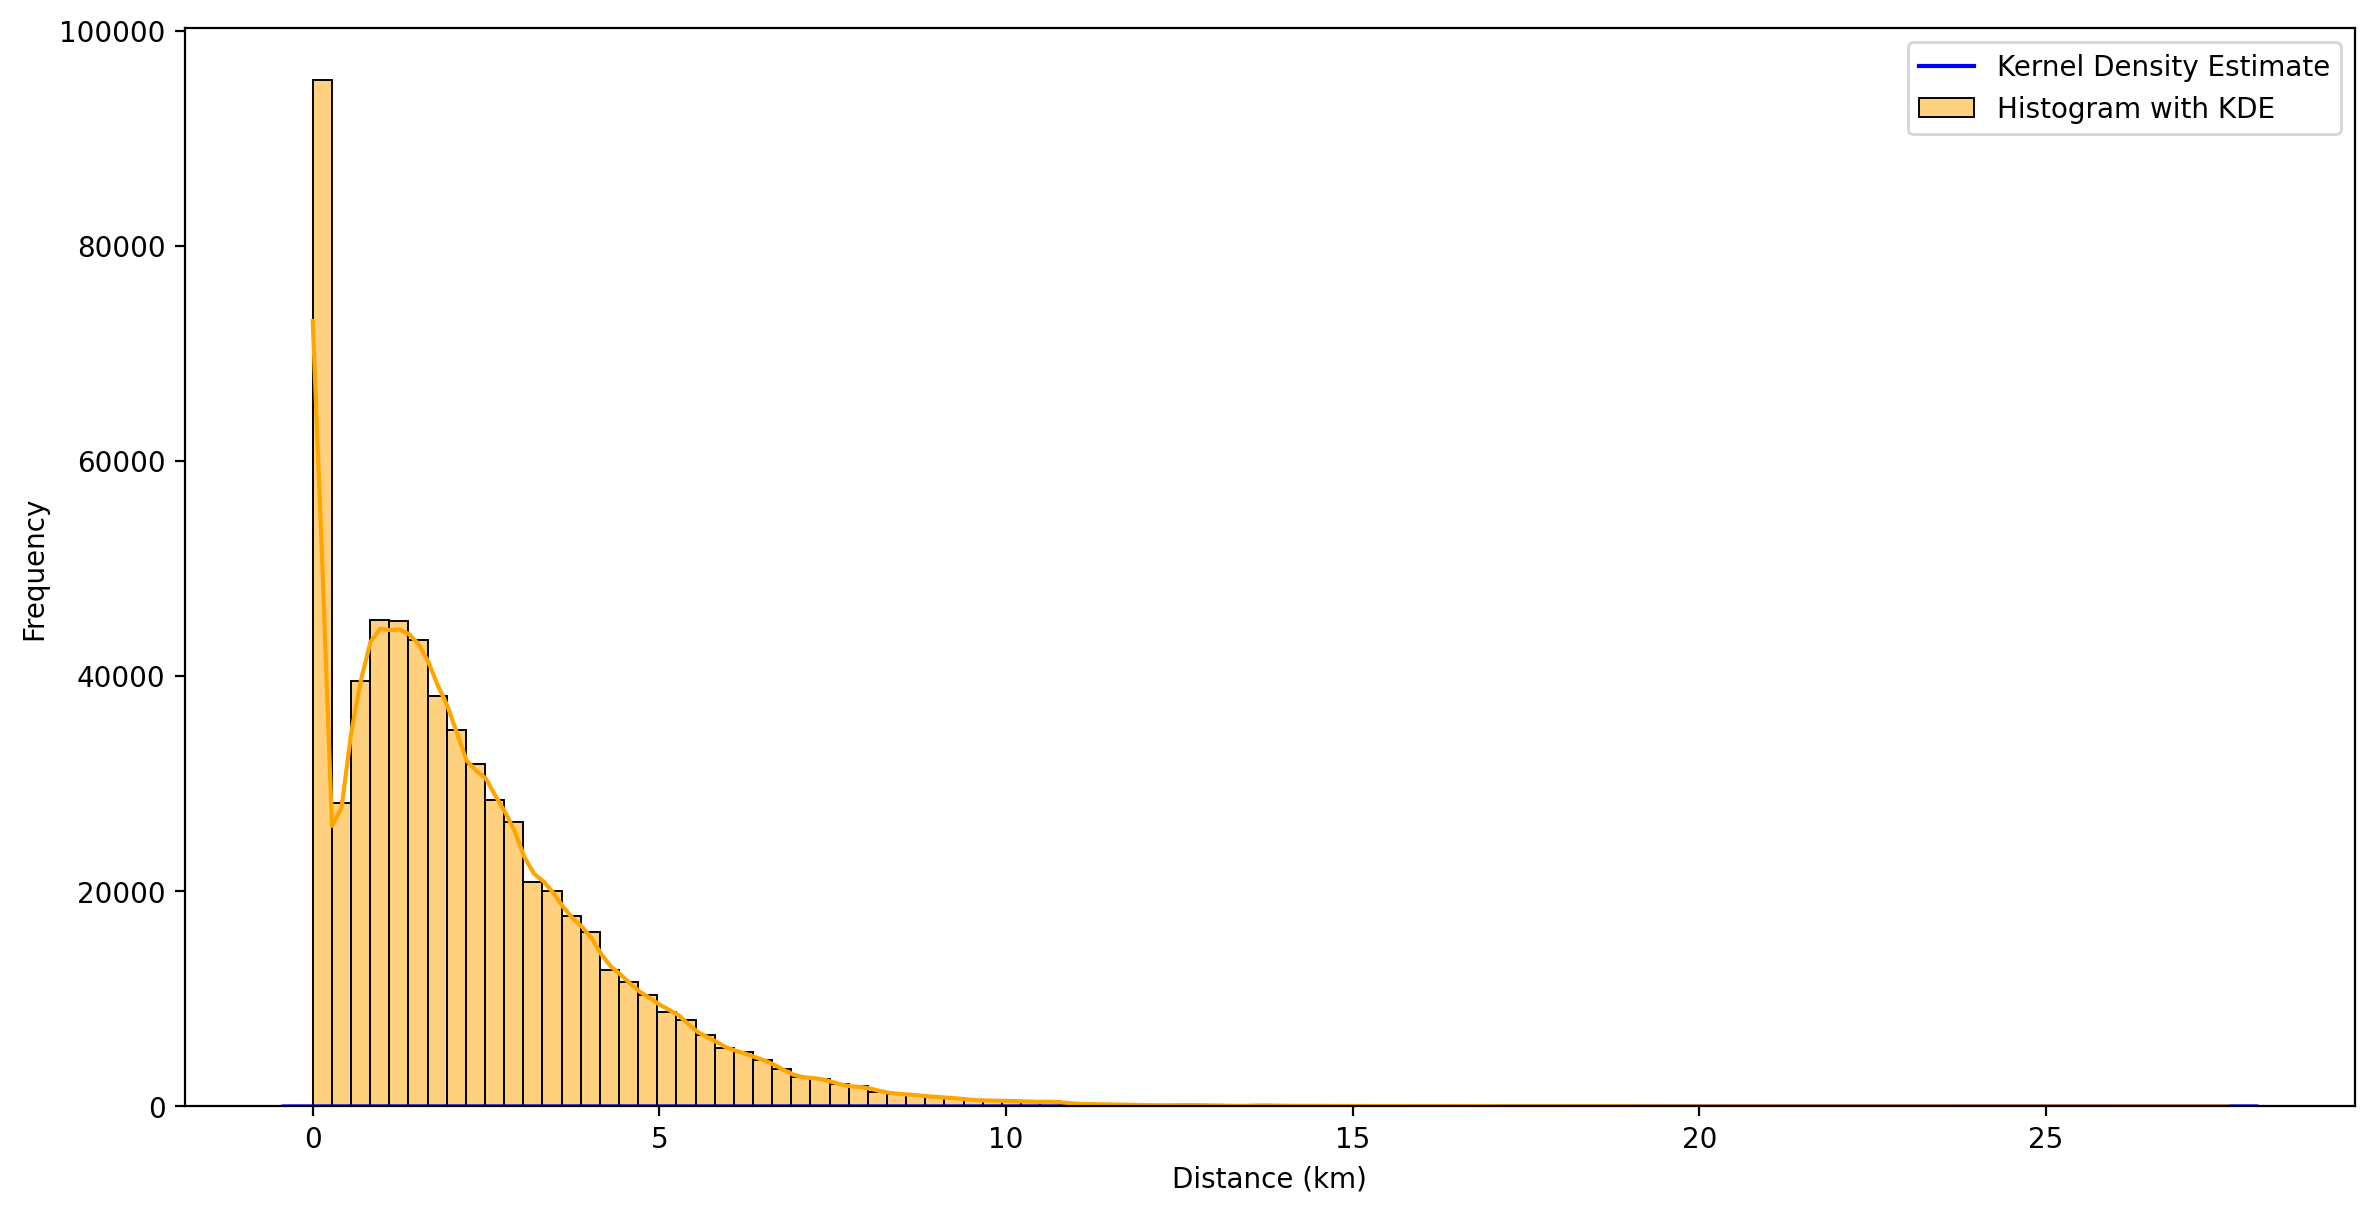

In [68]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
sns.kdeplot(df_lockdown1["distance"], color="b", label="Kernel Density Estimate")

# ヒストグラム
sns.histplot(df_lockdown1["distance"], bins=100, color="orange", kde=True, label="Histogram with KDE")

plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


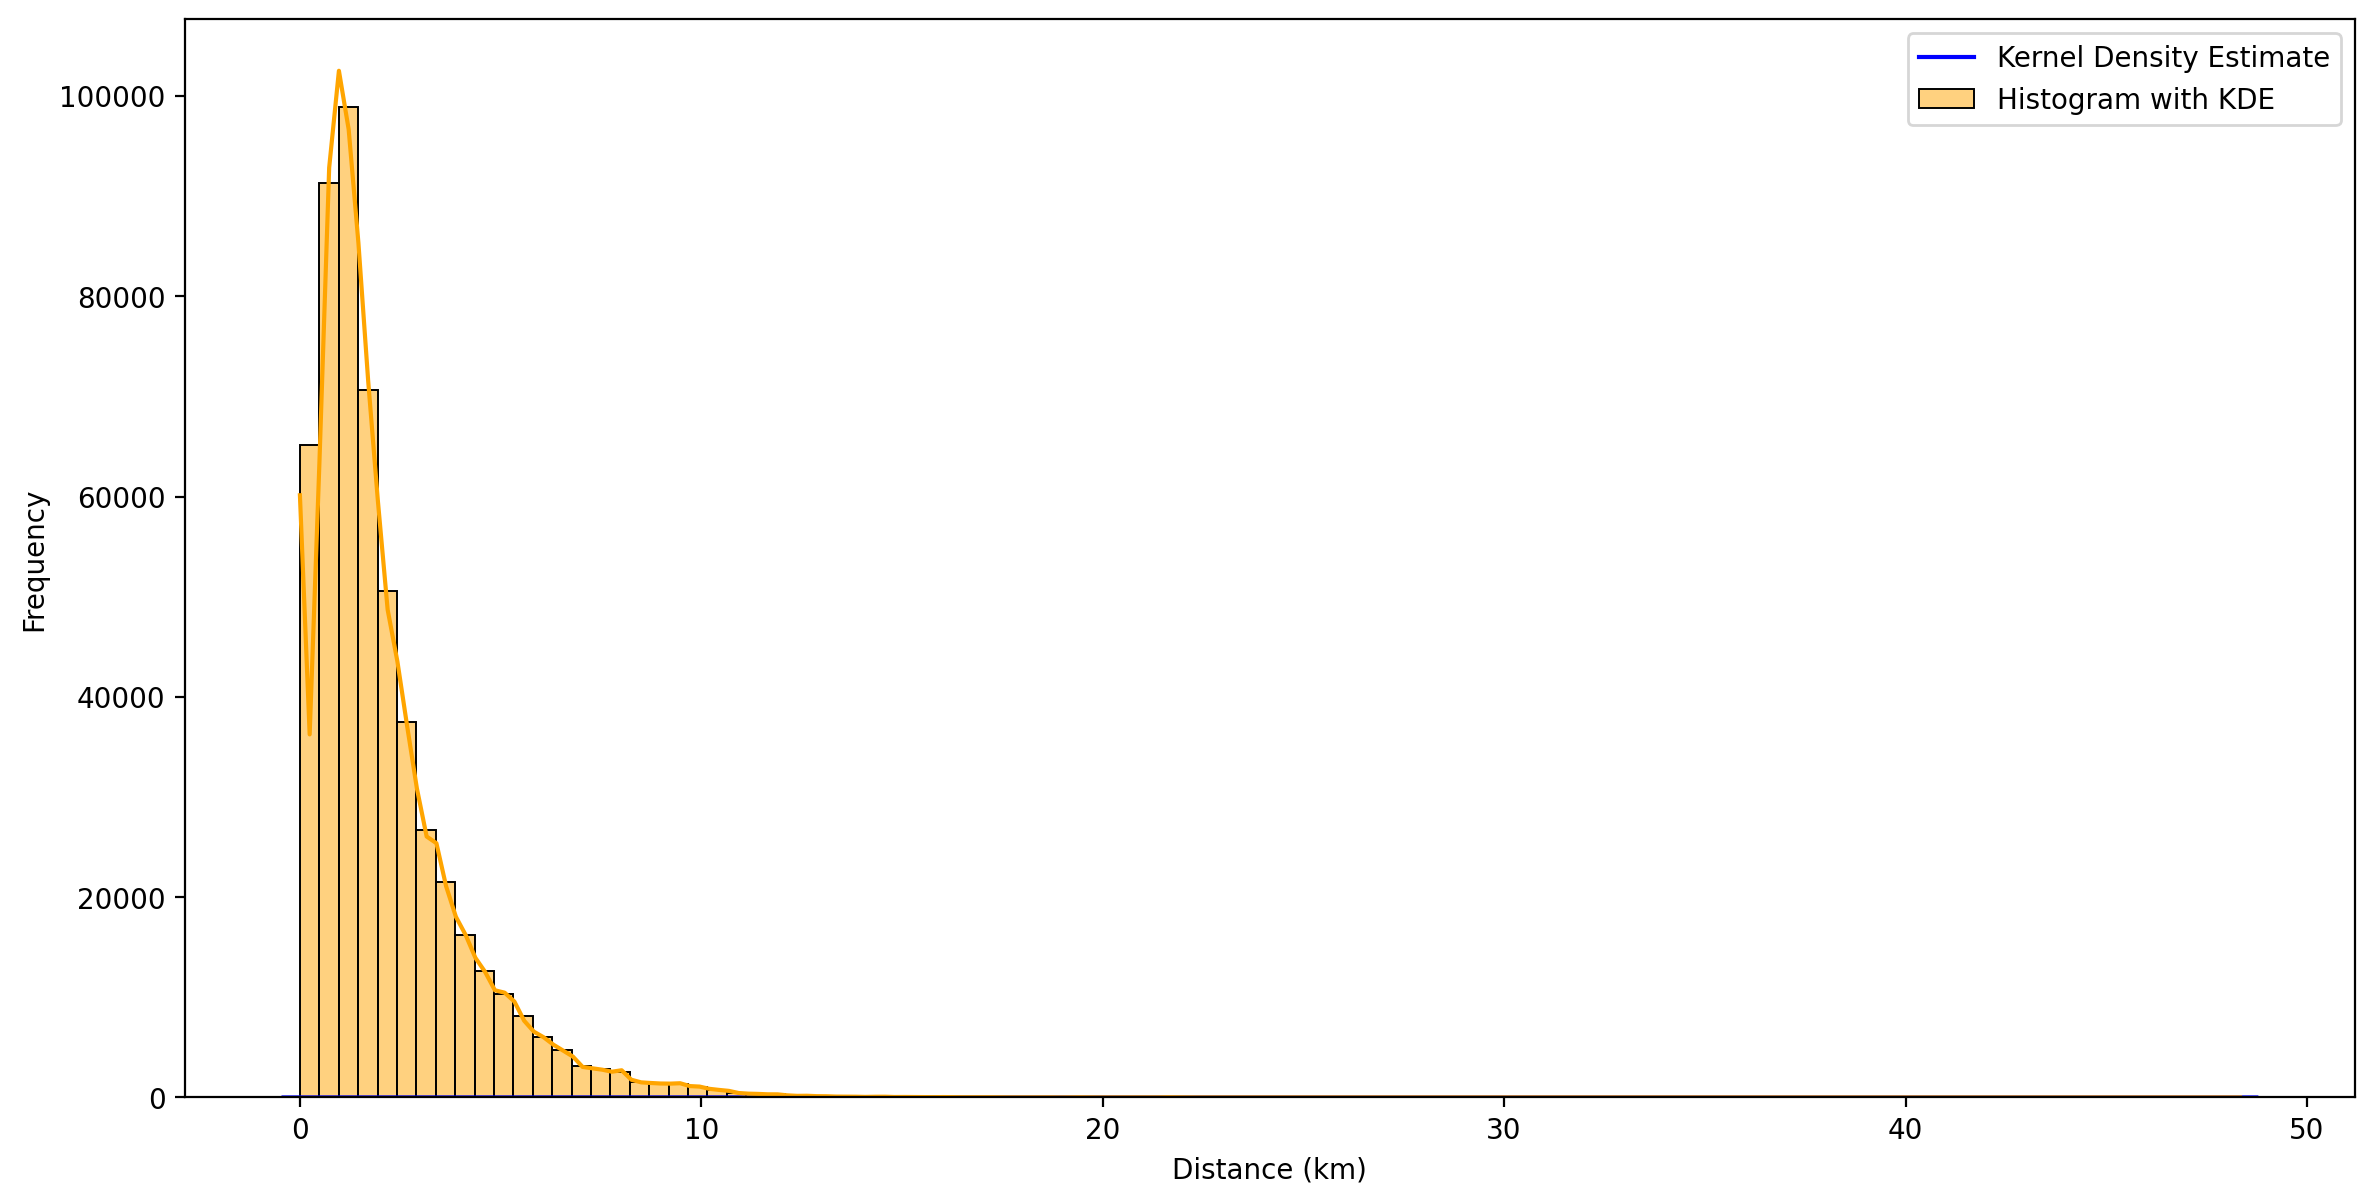

In [67]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
sns.kdeplot(df_lockdown2["distance"], color="b", label="Kernel Density Estimate")

# ヒストグラム
sns.histplot(df_lockdown2["distance"], bins=100, color="orange", kde=True, label="Histogram with KDE")

plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


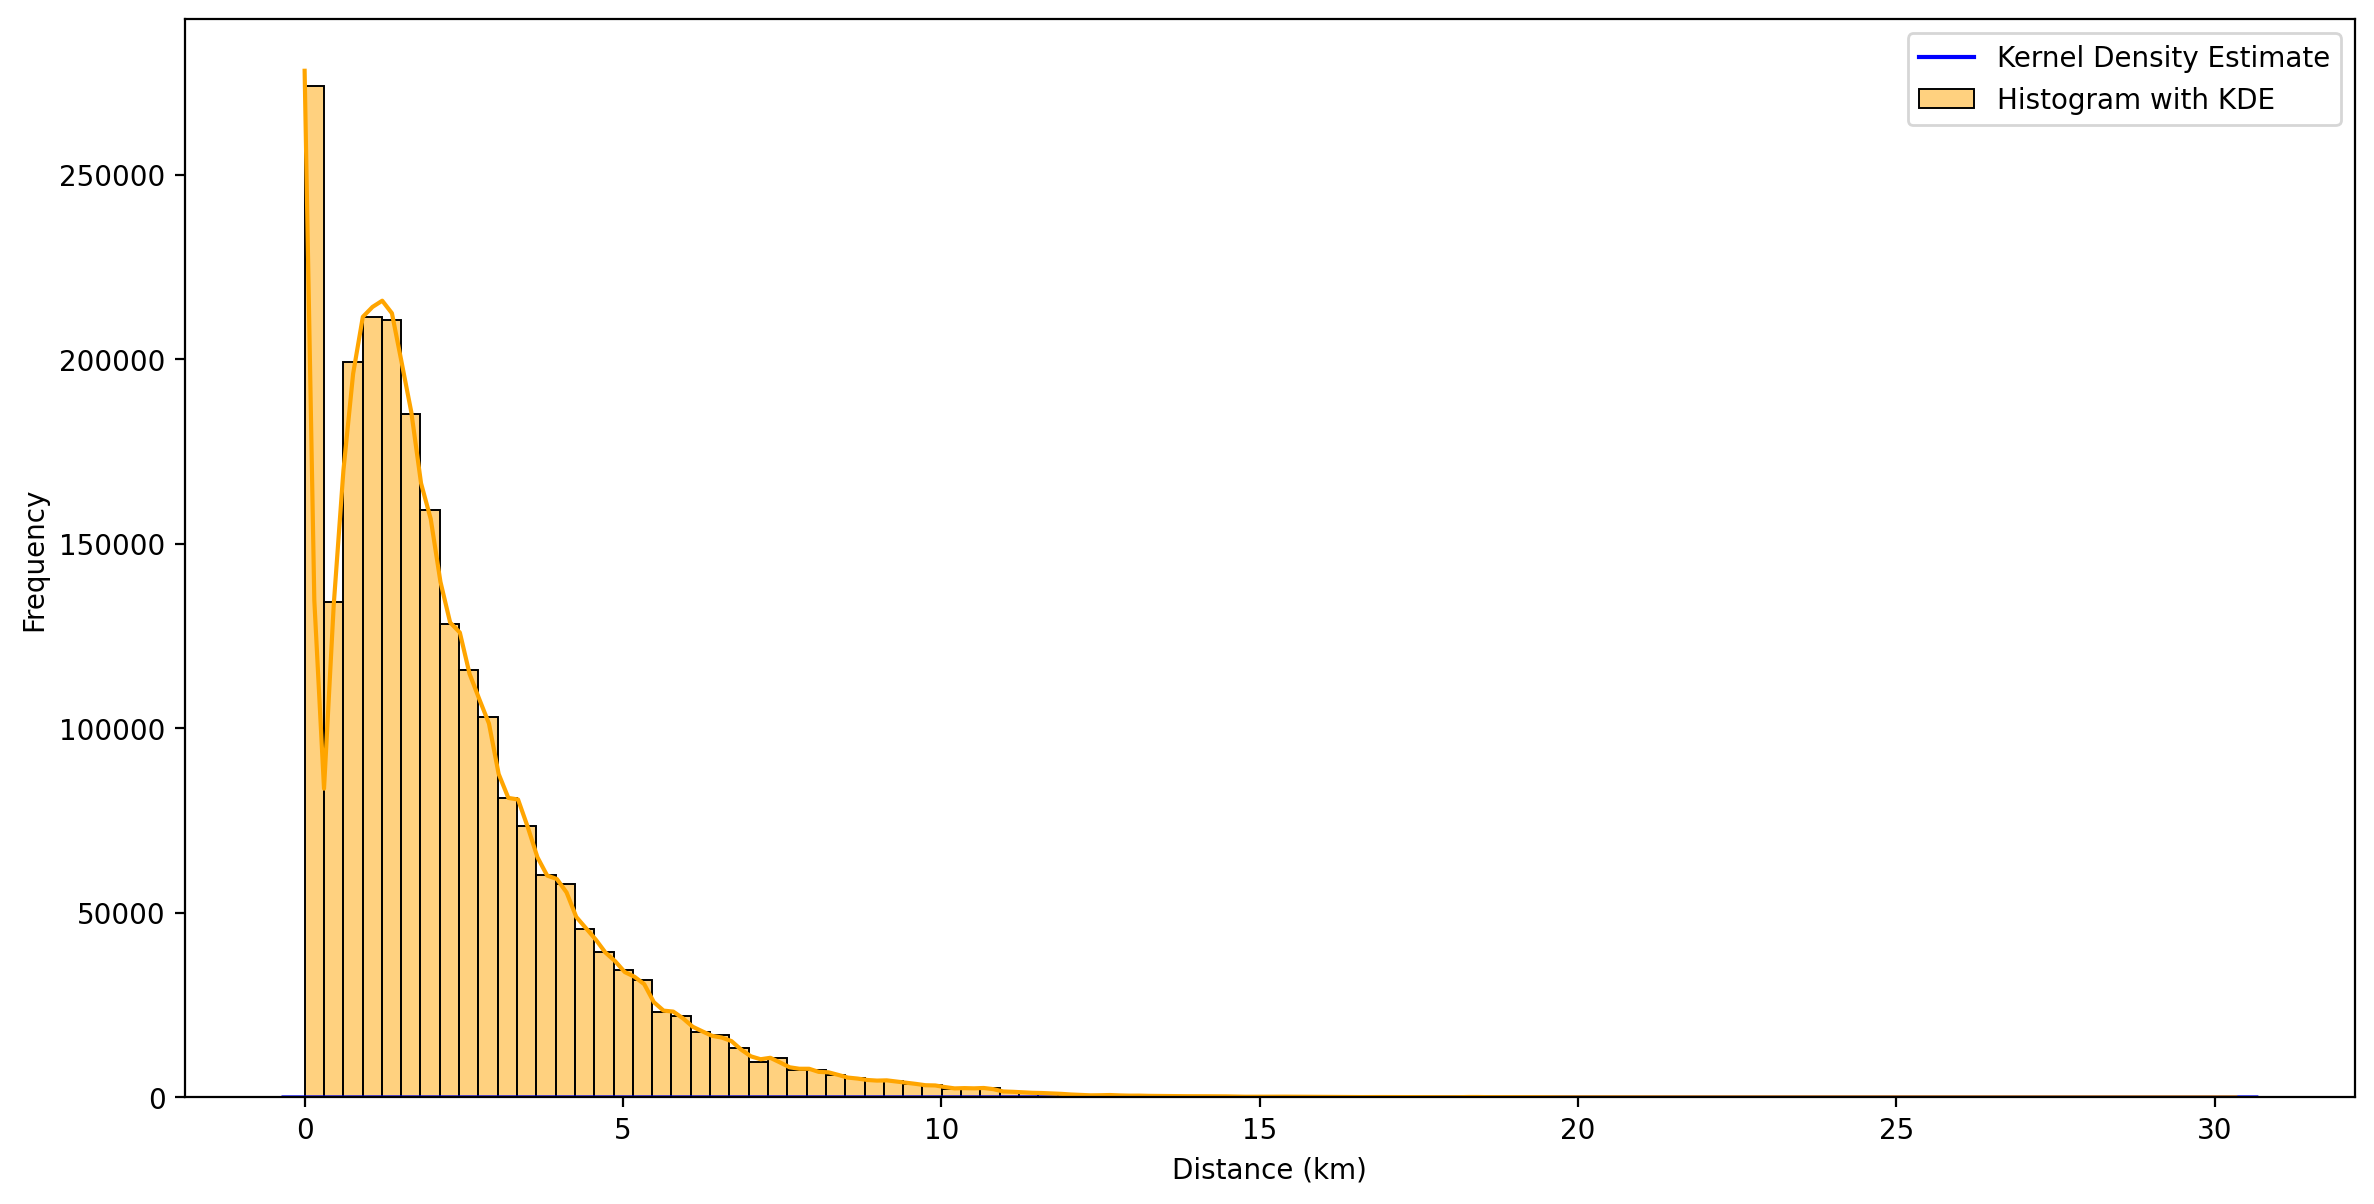

In [69]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
sns.kdeplot(df_normal["distance"], color="b", label="Kernel Density Estimate")

# ヒストグラム
sns.histplot(df_normal["distance"], bins=100, color="orange", kde=True, label="Histogram with KDE")

plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [55]:
# ks test
from scipy.stats import ks_2samp
ks_2samp(df_lockdown1["distance"], df_lockdown2["distance"])

KstestResult(statistic=0.0838161939974798, pvalue=0.0, statistic_location=0.0001276493853059, statistic_sign=1)

In [53]:
ks_2samp(df_lockdown1["distance"], df_normal["distance"])

KstestResult(statistic=0.049950863726656455, pvalue=0.0, statistic_location=2.542811127786113e-05, statistic_sign=1)

In [54]:
ks_2samp(df_lockdown2["distance"], df_normal["distance"])

KstestResult(statistic=0.058222818777062035, pvalue=0.0, statistic_location=2.011635502958518, statistic_sign=1)

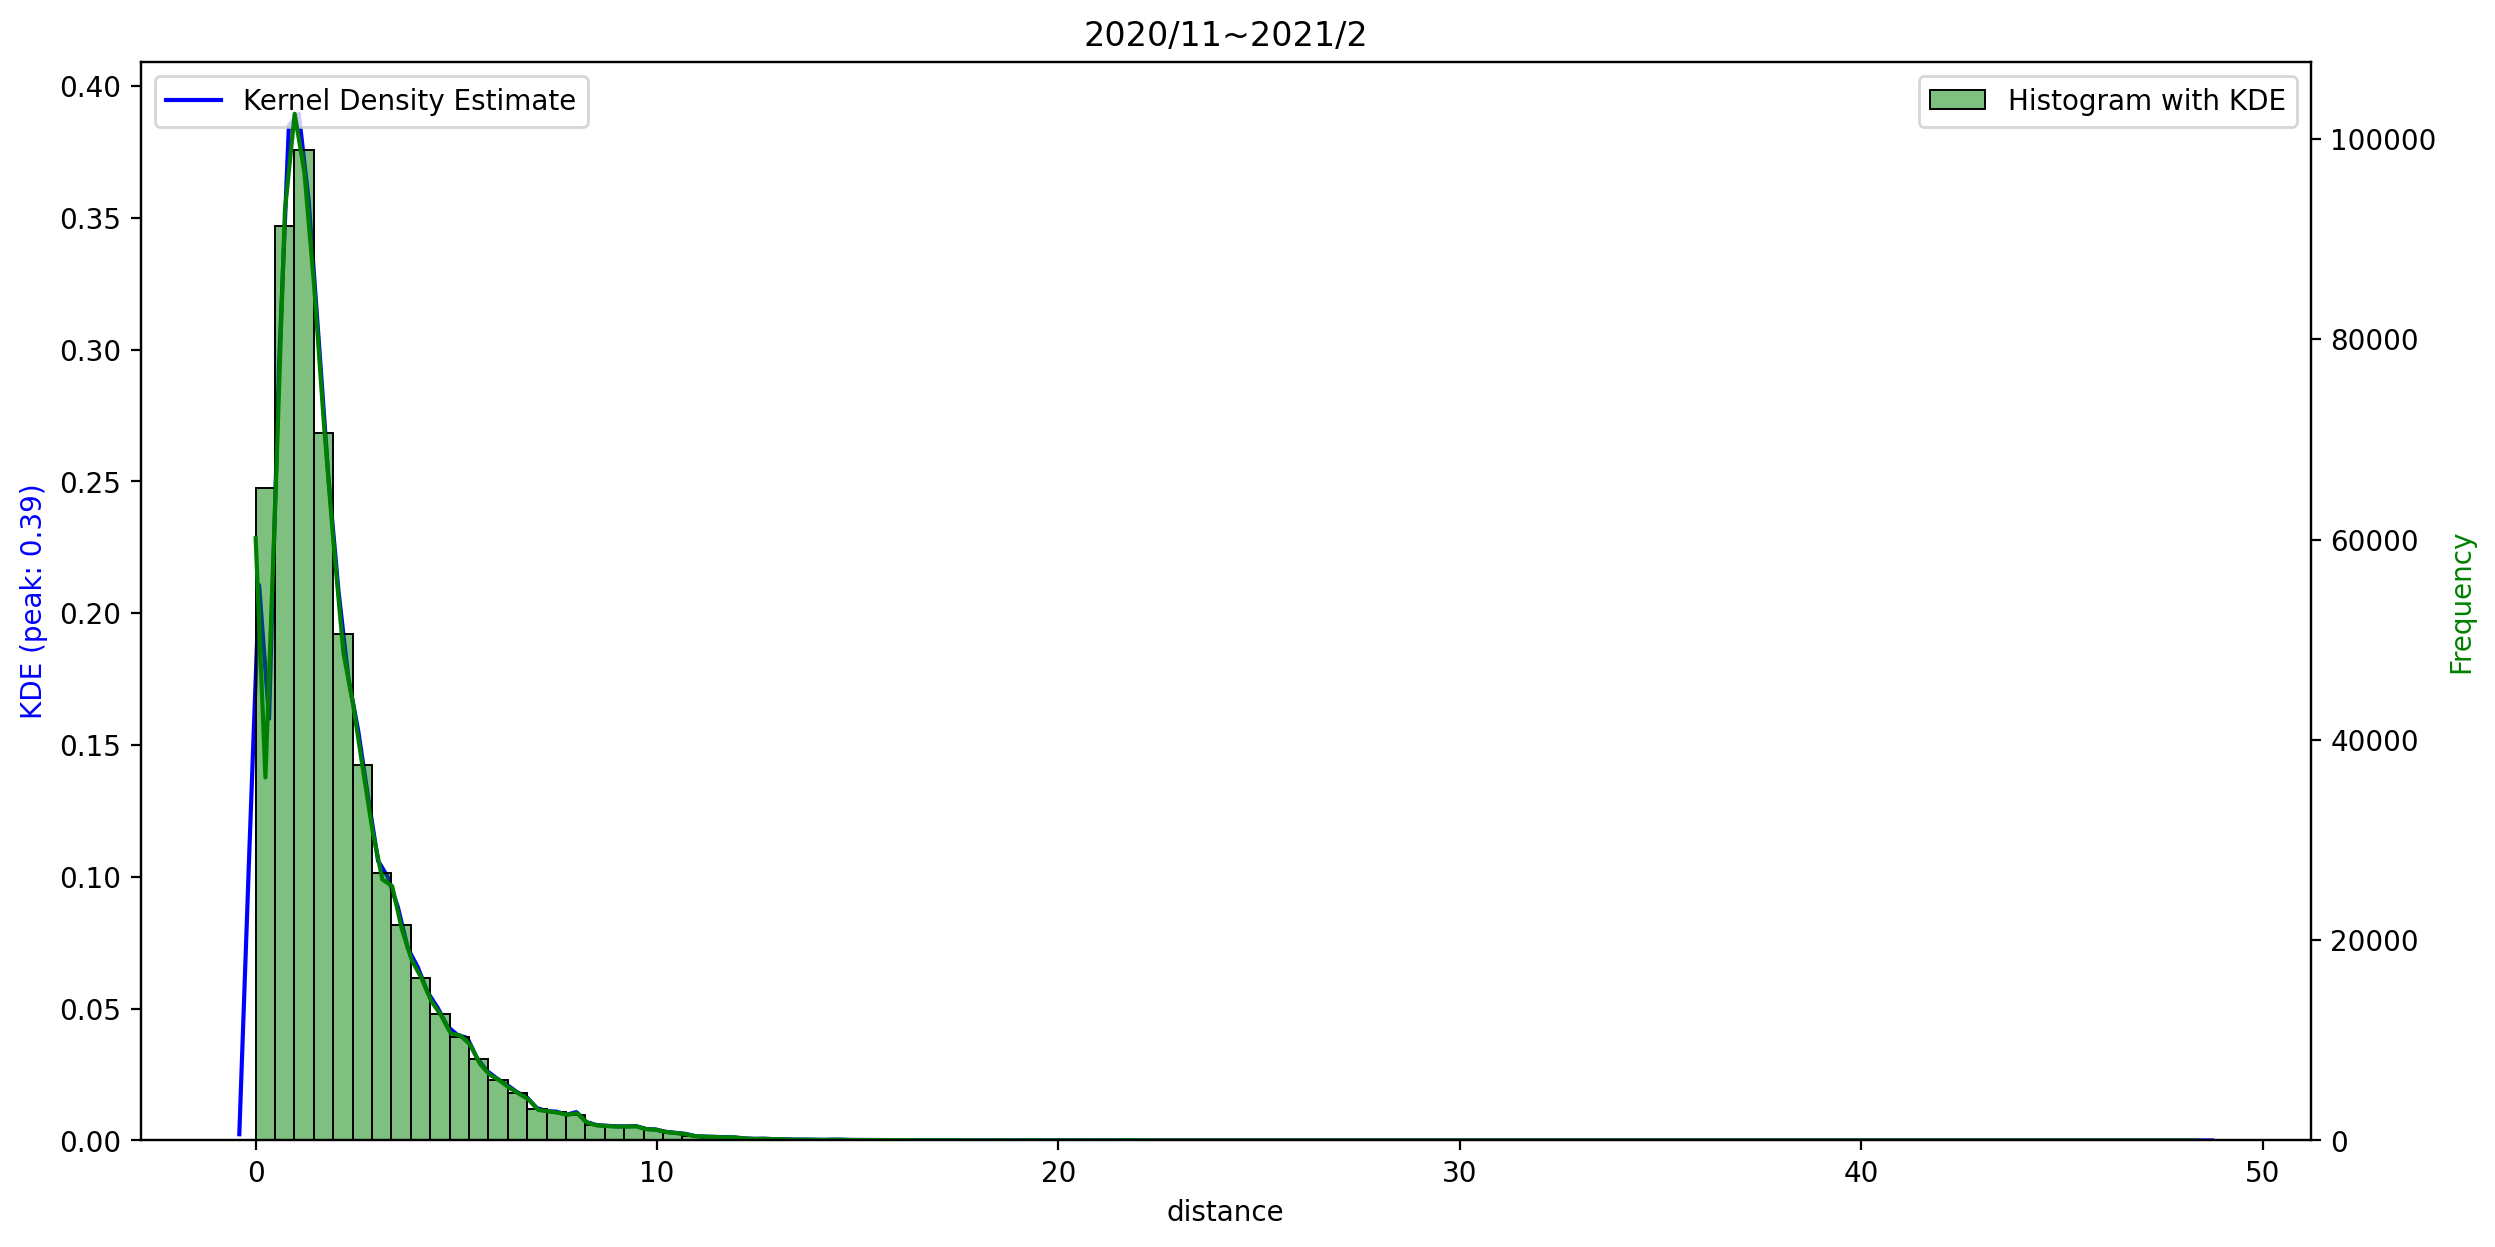

In [74]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
ax1 = sns.kdeplot(df_lockdown2["distance"], color="b", label="Kernel Density Estimate")

# カーネル密度推定のピーク値を取得
kde_peak_value = ax1.get_lines()[0].get_data()[1].max()

# ヒストグラム
ax2 = ax1.twinx()
sns.histplot(df_lockdown2["distance"], bins=100, color="g", kde=True, label="Histogram with KDE")

plt.xlabel("Distance (km)")

# y 軸のラベルにカーネル密度推定とヒストグラムのラベルを表示
ax1.set_ylabel(f"KDE (peak: {kde_peak_value:.2f})", color="b")
ax2.set_ylabel("Frequency", color="g")

# 凡例を表示
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("2020/11~2021/2")
plt.show()



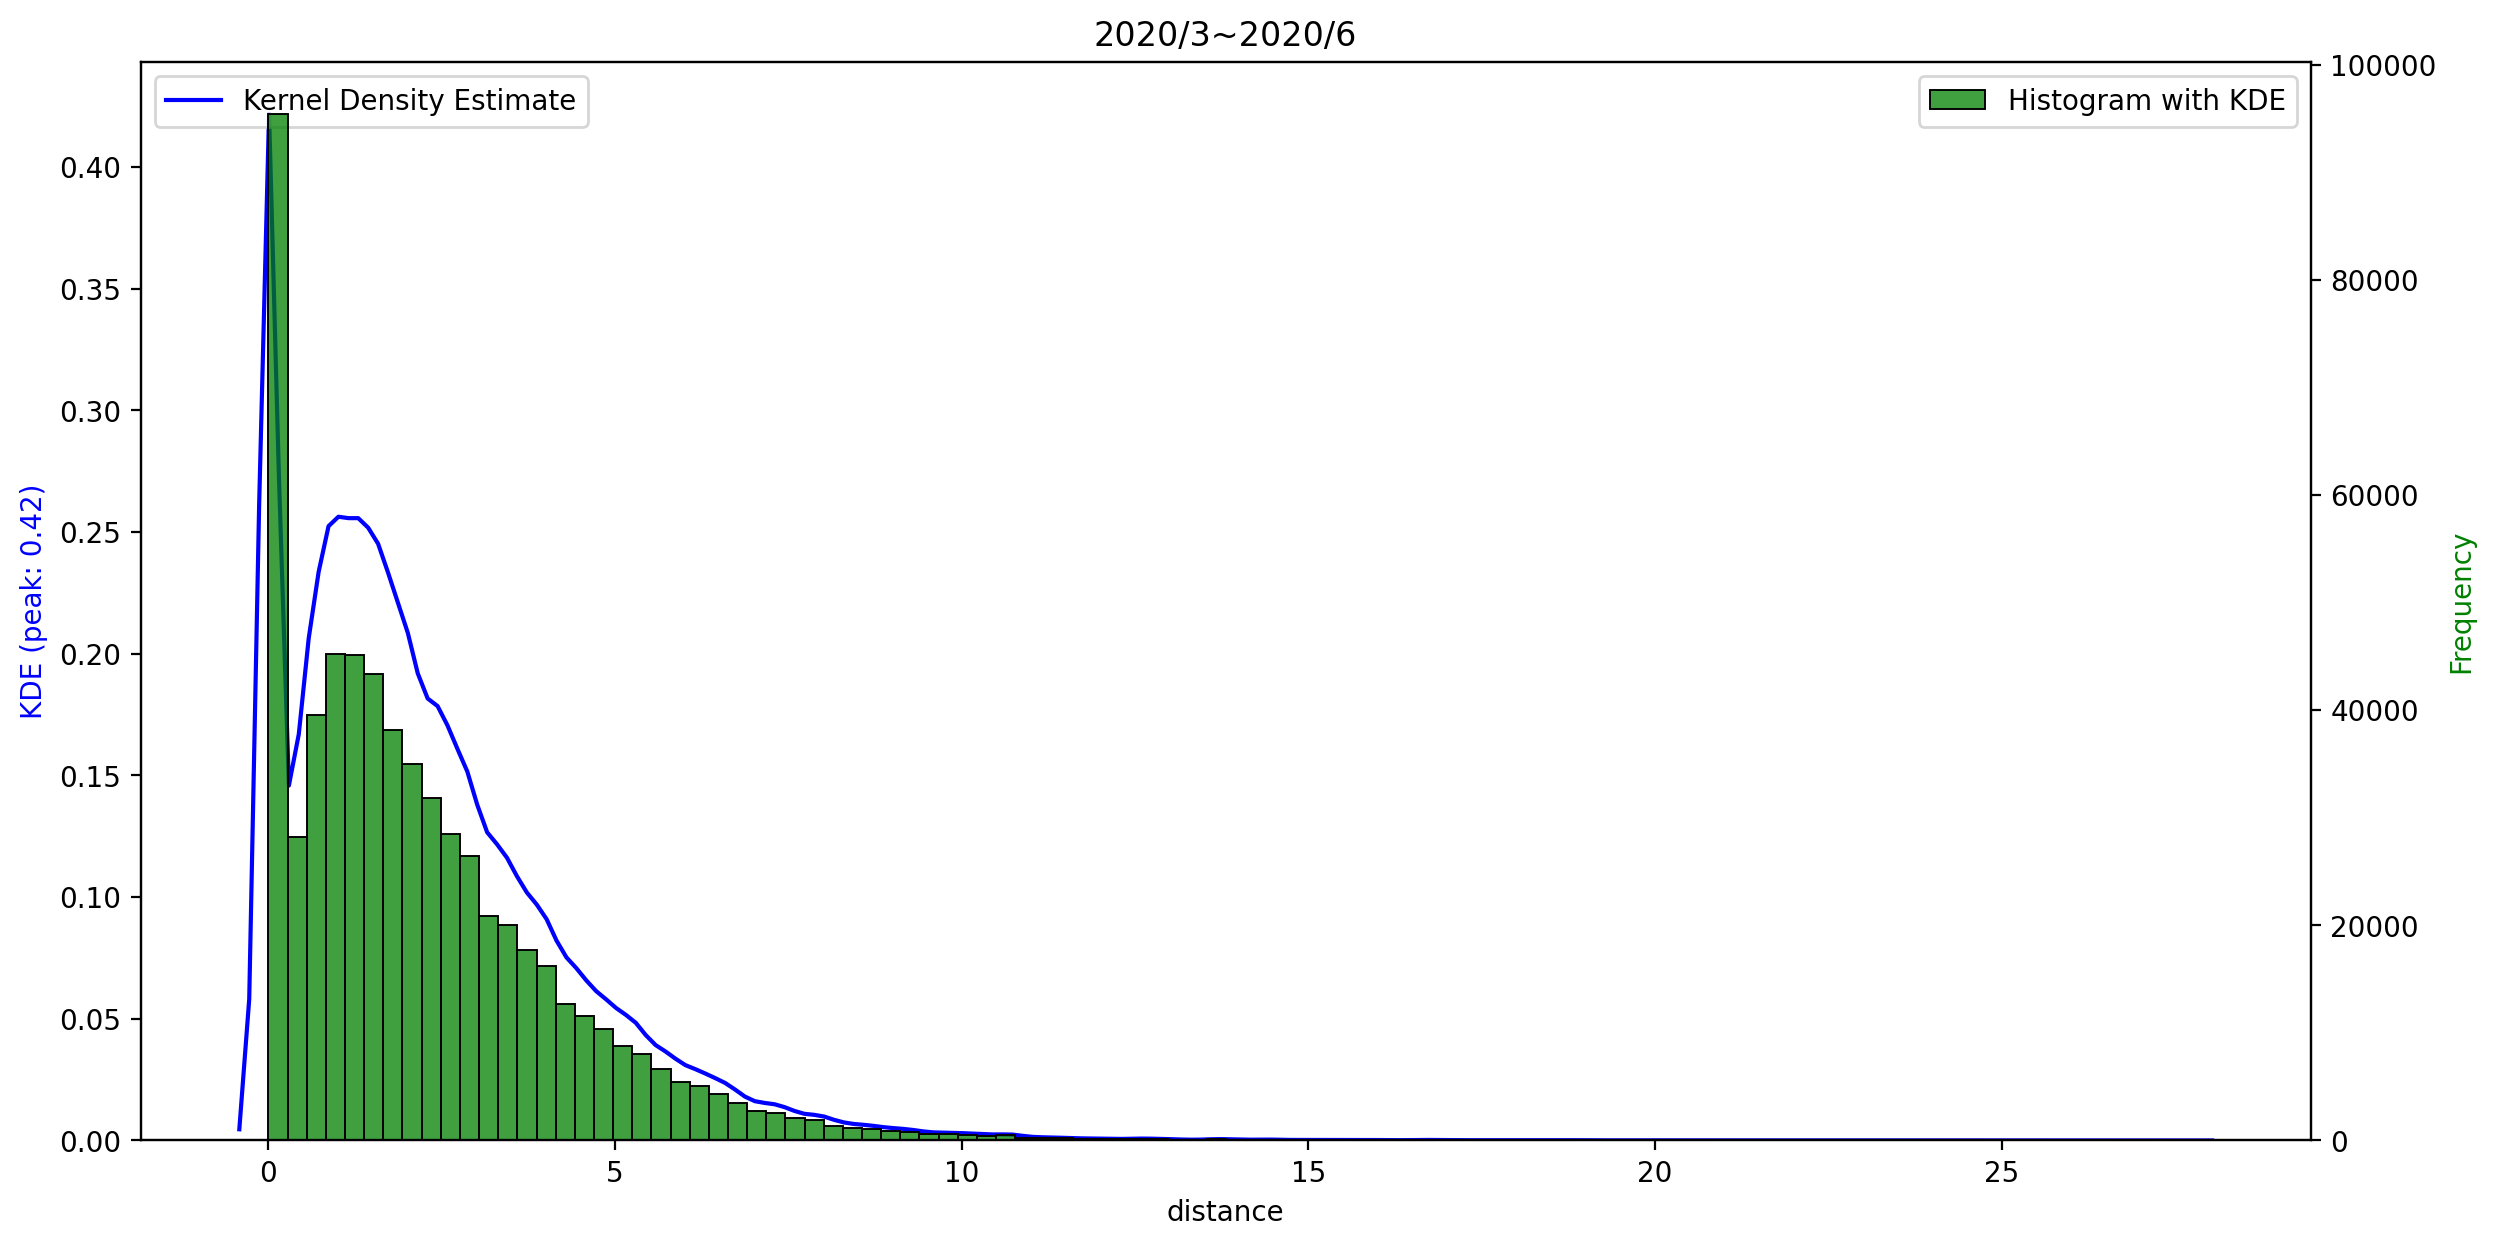

In [86]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
ax1 = sns.kdeplot(df_lockdown1["distance"], color="b", label="Kernel Density Estimate")

# カーネル密度推定のピーク値を取得
kde_peak_value = ax1.get_lines()[0].get_data()[1].max()

# ヒストグラム
ax2 = ax1.twinx()
sns.histplot(df_lockdown1["distance"], bins=100, color="g", kde=False, label="Histogram with KDE")

plt.xlabel("Distance (km)")

# y 軸のラベルにカーネル密度推定とヒストグラムのラベルを表示
ax1.set_ylabel(f"KDE (peak: {kde_peak_value:.2f})", color="b")
ax2.set_ylabel("Frequency", color="g")

# 凡例を表示
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("2020/3~2020/6")
plt.show()

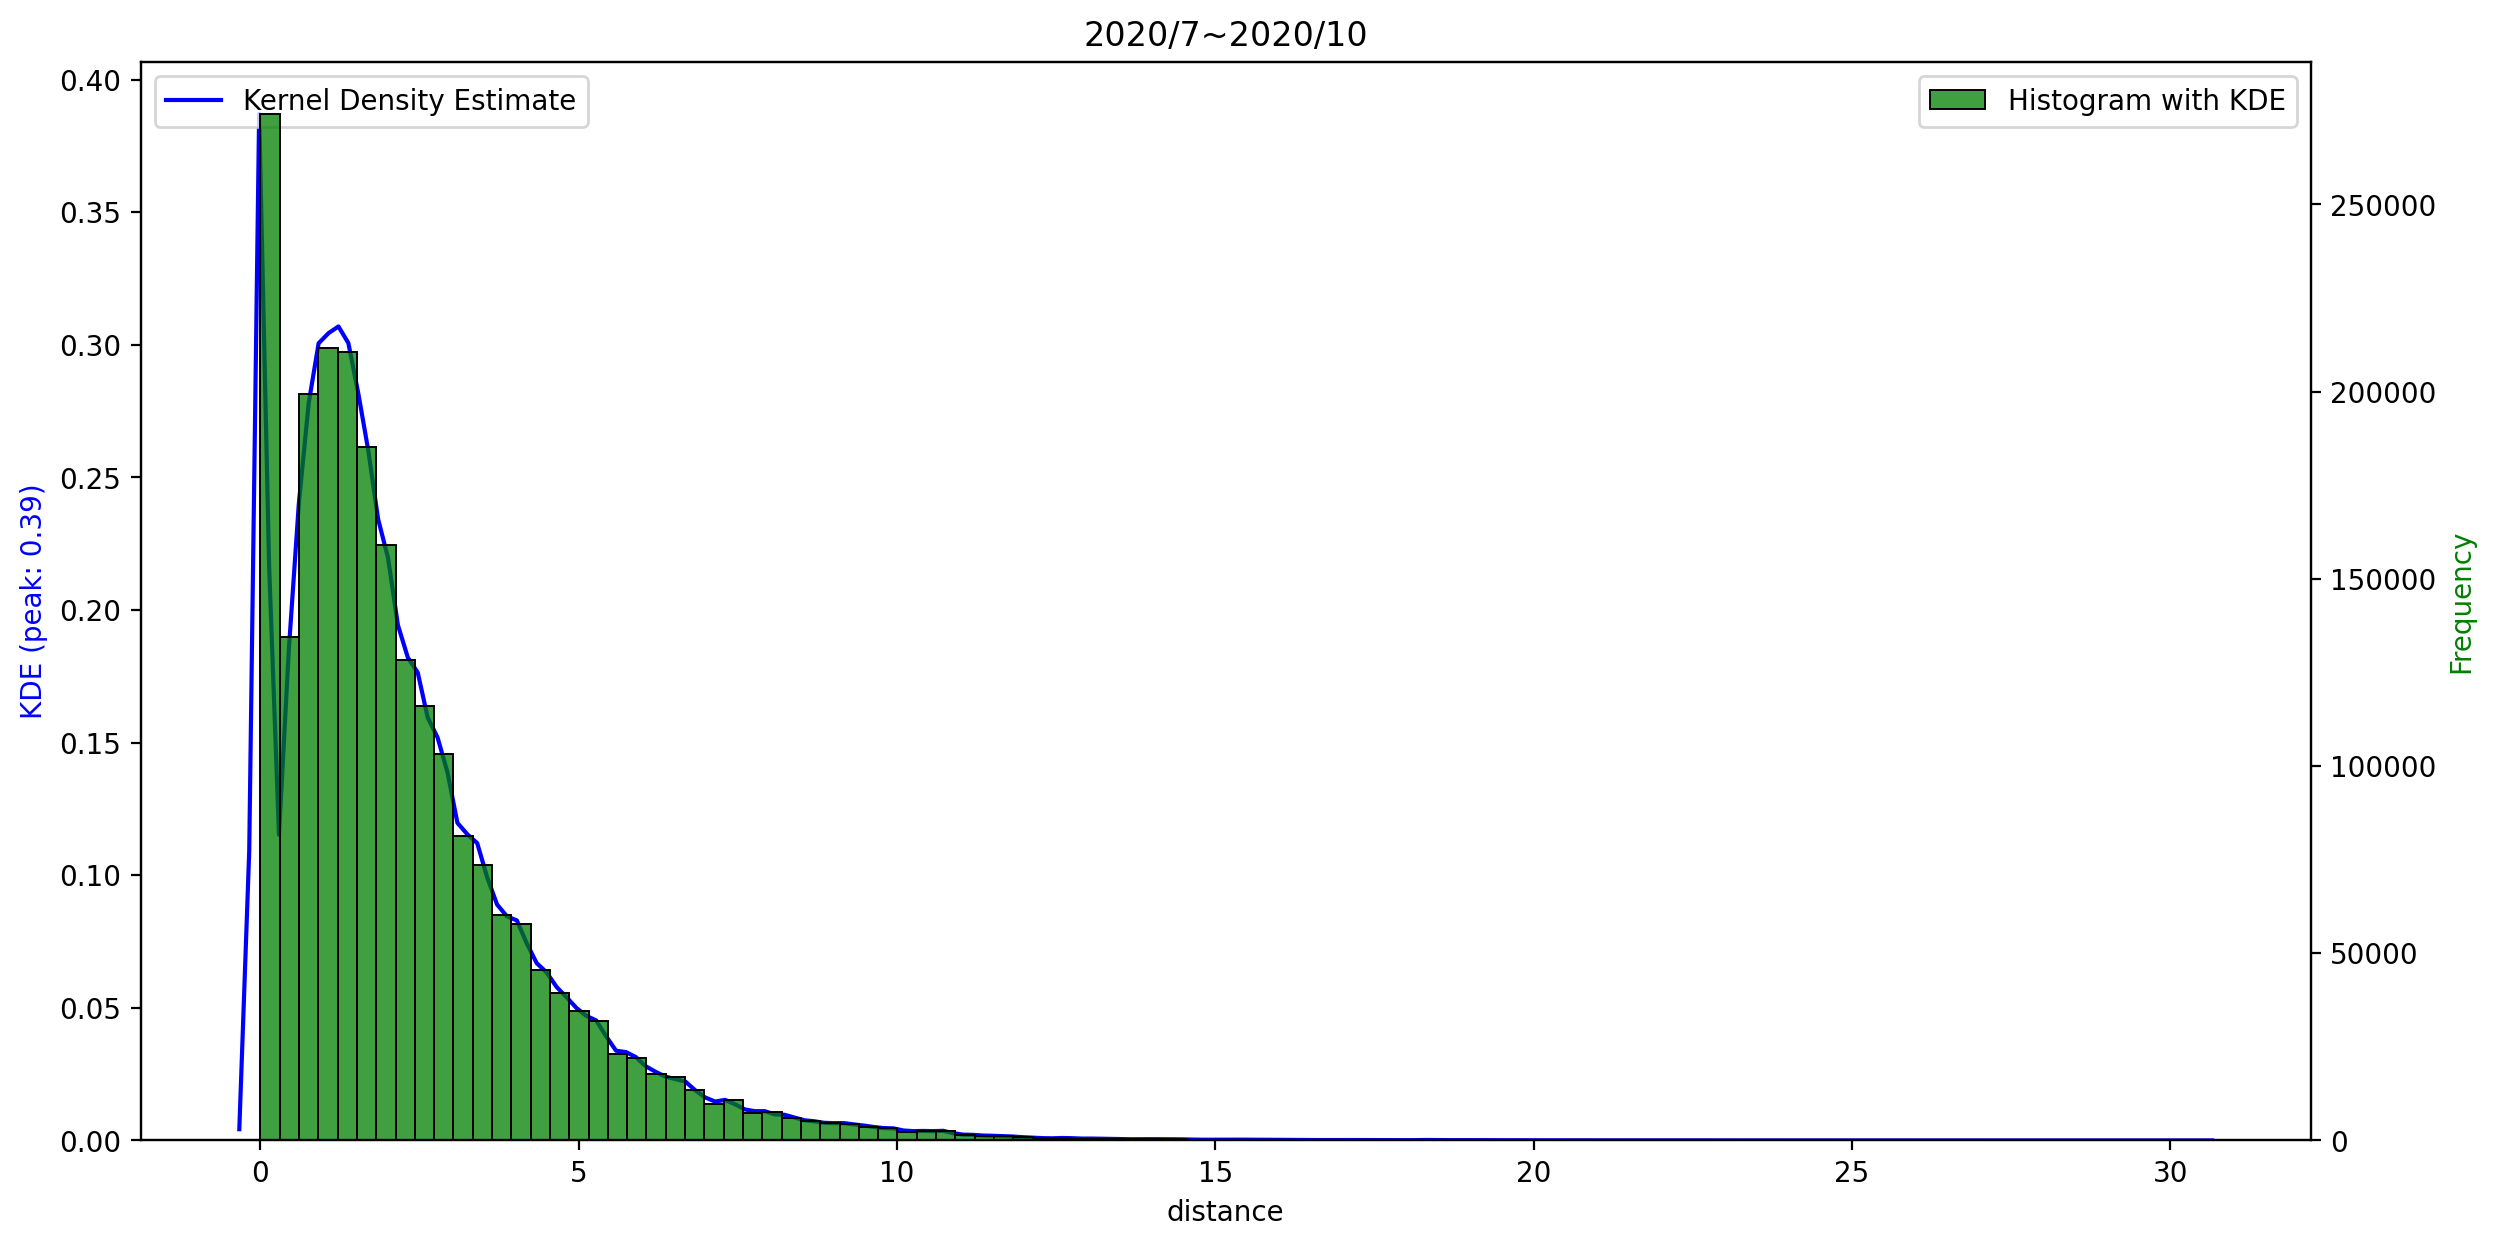

In [88]:
plt.figure(figsize=(14, 7))

# カーネル密度推定
ax1 = sns.kdeplot(df_normal["distance"], color="b", label="Kernel Density Estimate")

# カーネル密度推定のピーク値を取得
kde_peak_value = ax1.get_lines()[0].get_data()[1].max()

# ヒストグラム
ax2 = ax1.twinx()
sns.histplot(df_normal["distance"], bins=100, color="g", kde=False, label="Histogram with KDE")

plt.xlabel("Distance (km)")

# y 軸のラベルにカーネル密度推定とヒストグラムのラベルを表示
ax1.set_ylabel(f"KDE (peak: {kde_peak_value:.2f})", color="b")
ax2.set_ylabel("Frequency", color="g")

# 凡例を表示
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("2020/7~2020/10")
plt.show()



/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_3375/1637419863.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_202203_202309_nd[0], df_202203_202309_nd[1], label="2022/4~2023/9", cmap="viridis", marker="o", s=15)


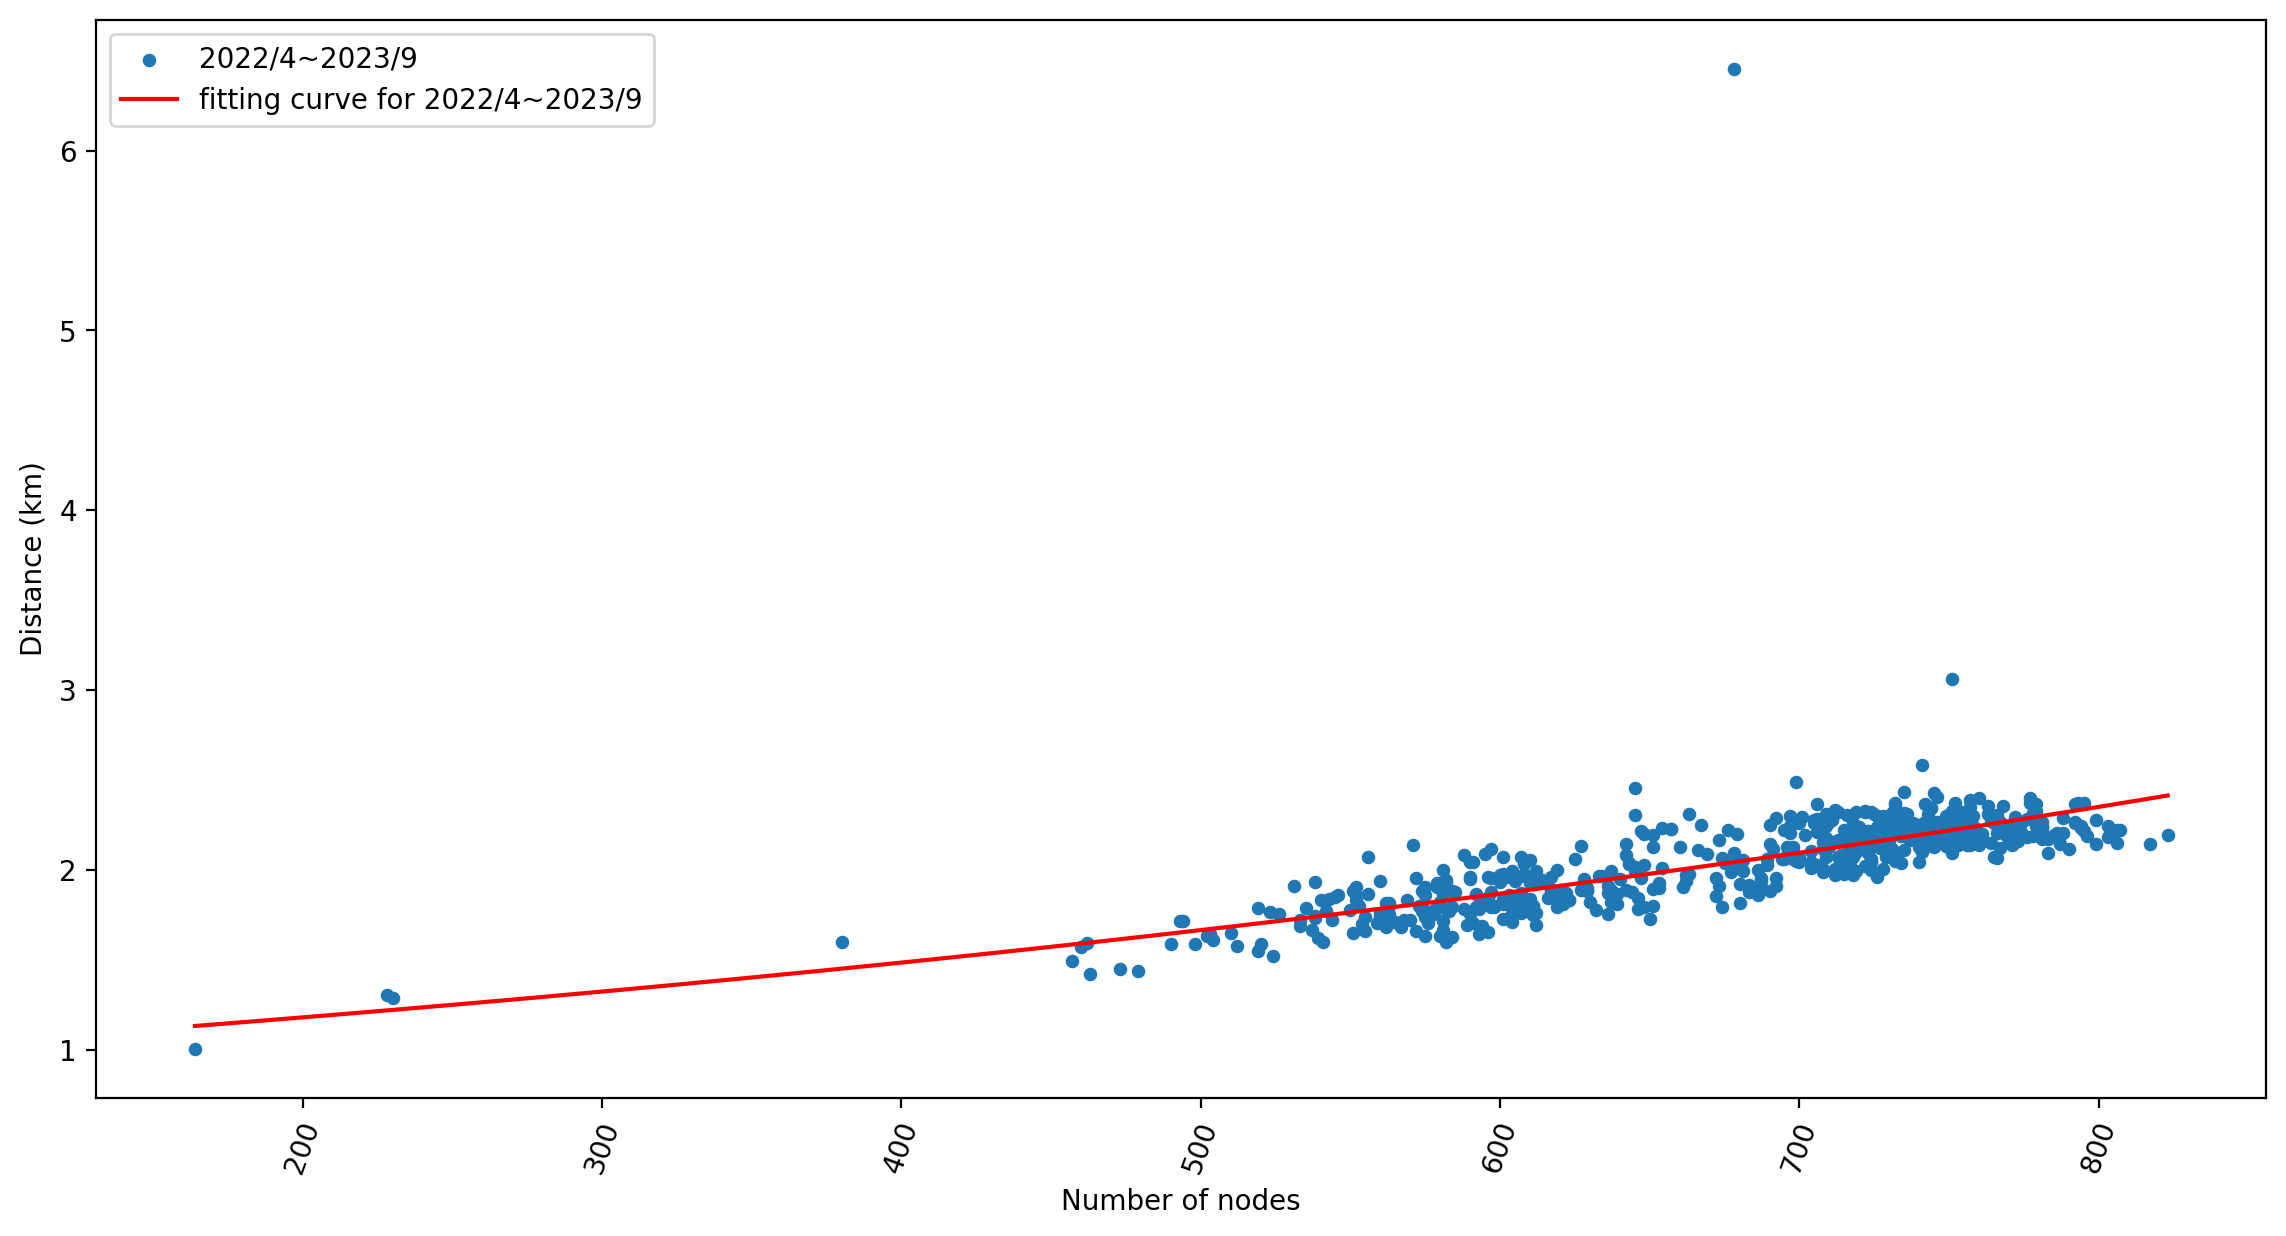

In [89]:
# lockdown_ndを近似曲線にフィットさせる
plt.figure(figsize=(14,7))
plt.scatter(df_202203_202309_nd[0], df_202203_202309_nd[1], label="2022/4~2023/9", cmap="viridis", marker="o", s=15)


# Fit an exponential curve
coef = np.polyfit(df_202203_202309_nd[0], np.log(df_202203_202309_nd[1]), 1)
n_fit = np.linspace(min(df_202203_202309_nd[0]), max(df_202203_202309_nd[0]), 100)
d_ft = np.exp(coef[1]) * np.exp(coef[0]*n_fit)



plt.plot(n_fit, d_ft, 'r-', label="fitting curve for 2022/4~2023/9")


plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()

plt.show()